# **Machine Learning Project**
---

## **PART I : Problem Understanding and Basic Setup**
---

### **I. Problem Description**

#### ***Objectif:***

> Predict whether a protein is an effector or not, focusing on discovering novel effector families.

#### ***Challenges:***

- Limited labeled data,
- protein sequence complexity,
- potential domain similarity biases.

### **II. Project Setup**
#### ***Libraries:***

In [1]:
# All python libraries necessary for the project are imported here

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, precision_recall_fscore_support, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#### ***Data Loading:***

In [2]:
# Mounting the drive to access to the data

#from google.colab import drive
#drive.mount('/content/drive')

#folder_path = '/content/drive/My Drive/data'
folder_path = '../data'


In [3]:
# Loading the data

pos_features = pd.read_csv(folder_path + "/training_pos_features.csv", index_col=0)
pos_labels = pd.read_csv(folder_path + "/training_pos_labels.csv", index_col=0)
pos_sequences = pd.read_csv(folder_path + "/training_pos_features_sequences.csv", index_col=0)

In [6]:
# Testing

pos_features.head()

G1_A   G1_G   G1_I   G1_L   G1_P   G1_V  \
GCA_000219475.3_ASM21947v3_461   0.062  0.056  0.067  0.101  0.022  0.051   
GCA_000219475.3_ASM21947v3_1024  0.051  0.097  0.072  0.041  0.056  0.077   
GCA_000272795.2_ASM27279v2_347   0.072  0.080  0.035  0.078  0.030  0.039   
GCA_000307975.2_ASM30797v2_3218  0.080  0.102  0.085  0.080  0.034  0.097   
GCA_000359545.5_G255_GS_139      0.040  0.028  0.080  0.092  0.015  0.058   

                                  G1_F   G1_W   G1_Y   G1_D  ...       G5_90  \
GCA_000219475.3_ASM21947v3_461   0.067  0.006  0.051  0.045  ...  -23.698221   
GCA_000219475.3_ASM21947v3_1024  0.051  0.010  0.026  0.087  ...  -30.395803   
GCA_000272795.2_ASM27279v2_347   0.033  0.014  0.069  0.062  ... -100.037810   
GCA_000307975.2_ASM30797v2_3218  0.028  0.017  0.028  0.040  ...  -26.579092   
GCA_000359545.5_G255_GS_139      0.052  0.000  0.037  0.055  ...  -42.501670   

                                     G5_91      G5_92      G5_93       G5_94  \
GCA_000219475.3_ASM21947v3_461   17.901250   5.115721   6.049777   48.481403   
GCA_000219475.3_ASM21947v3_1024  19.491444   1.406330   3.654956   50.511590   
GCA_000272795.2_ASM27279v2_347   70.133760  32.452530  25.088923  189.621900   
GCA_000307975.2_ASM30797v2_3218  19.061409   3.146282  -1.448362   47.171337   
GCA_000359545.5_G255_GS_139      32.565193   8.332082  10.442863   82.946310   

                                     G5_95      G5_96     G5_97      G5_98  \
GCA_000219475.3_ASM21947v3_461    6.253887   4.523708  5.023469   4.033730   
GCA_000219475.3_ASM21947v3_1024   6.889894   2.494541  0.968998   3.563518   
GCA_000272795.2_ASM27279v2_347   20.636720  13.719143  5.043215  23.463377   
GCA_000307975.2_ASM30797v2_3218   6.517907   5.164891  2.746038   3.234078   
GCA_000359545.5_G255_GS_139       8.117318   9.747616 -0.907579   6.129117   

                                     G5_99  
GCA_000219475.3_ASM21947v3_461  -14.651406  
GCA_000219475.3_ASM21947v3_1024 -20.288240  
GCA_000272795.2_ASM27279v2_347  -66.688440  
GCA_000307975.2_ASM30797v2_3218 -19.241081  
GCA_000359545.5_G255_GS_139     -27.166908  

[5 rows x 2252 columns]

In [4]:
others_sequences = pd.read_csv(folder_path + "/training_others_features_sequences.csv", index_col=0)

# Loading the unlabelled data in chunks due to the size

chunk_size = 100000  # Number of rows to read at a time
file_path = folder_path + "/training_others_features.csv"
chunks = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size, index_col=0):
    chunks.append(chunk)

others_features = pd.concat(chunks)


In [5]:
others_features.head()

G1_A   G1_G   G1_I   G1_L   G1_P   G1_V  \
GCA_000219475.3_ASM21947v3_686   0.048  0.038  0.019  0.114  0.029  0.048   
GCA_000219475.3_ASM21947v3_1904  0.040  0.040  0.150  0.150  0.020  0.060   
GCA_000219475.3_ASM21947v3_1502  0.049  0.045  0.077  0.092  0.040  0.052   
GCA_000219475.3_ASM21947v3_694   0.000  0.083  0.021  0.042  0.021  0.062   
GCA_000219475.3_ASM21947v3_479   0.072  0.054  0.065  0.103  0.030  0.039   

                                  G1_F   G1_W   G1_Y   G1_D  ...      G5_90  \
GCA_000219475.3_ASM21947v3_686   0.048  0.029  0.048  0.029  ... -14.776466   
GCA_000219475.3_ASM21947v3_1904  0.040  0.010  0.040  0.045  ... -27.978956   
GCA_000219475.3_ASM21947v3_1502  0.047  0.014  0.052  0.040  ... -62.006886   
GCA_000219475.3_ASM21947v3_694   0.000  0.062  0.146  0.042  ...  -6.531873   
GCA_000219475.3_ASM21947v3_479   0.039  0.008  0.033  0.068  ... -78.634490   

                                     G5_91      G5_92      G5_93       G5_94  \
GCA_000219475.3_ASM21947v3_686    9.762773   5.556996   0.640943   28.434140   
GCA_000219475.3_ASM21947v3_1904  19.183930   1.772198   1.633372   48.420853   
GCA_000219475.3_ASM21947v3_1502  36.912590   4.957436  11.950544  103.098130   
GCA_000219475.3_ASM21947v3_694    4.052933   2.702244   2.536501   11.163493   
GCA_000219475.3_ASM21947v3_479   66.641450  29.068079  30.178963  177.737410   

                                     G5_95      G5_96     G5_97      G5_98  \
GCA_000219475.3_ASM21947v3_686    2.549713   0.894807  0.431560   1.567852   
GCA_000219475.3_ASM21947v3_1904   9.984998   5.429217  2.583957   4.150000   
GCA_000219475.3_ASM21947v3_1502  15.201302   8.894750  2.620954  11.465884   
GCA_000219475.3_ASM21947v3_694    2.597750   0.232150  1.461669   1.703640   
GCA_000219475.3_ASM21947v3_479   21.687609  14.127551  5.495019  14.307150   

                                     G5_99  
GCA_000219475.3_ASM21947v3_686   -9.754877  
GCA_000219475.3_ASM21947v3_1904 -20.526669  
GCA_000219475.3_ASM21947v3_1502 -38.369347  
GCA_000219475.3_ASM21947v3_694   -5.171810  
GCA_000219475.3_ASM21947v3_479  -47.261650  

[5 rows x 2252 columns]

---

## **PART II: Basic Data Exploration and Preprocessing**
---

### **I. Basic Dataset Exploration**

#### ***Quick Overview:***

In [7]:
pos_features.info()
pos_features.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, GCA_000219475.3_ASM21947v3_461 to GCF_000812185.1_ASM81218v1_1442
Columns: 2252 entries, G1_A to G5_99
dtypes: float64(2250), int64(2)
memory usage: 343.8+ MB


G1_A          G1_G          G1_I          G1_L          G1_P  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean       0.090529      0.080498      0.066584      0.096969      0.042963   
std        0.031175      0.028136      0.026021      0.028131      0.016768   
min        0.000000      0.000000      0.000000      0.008000      0.000000   
25%        0.068000      0.062000      0.048000      0.079000      0.032000   
50%        0.088000      0.080000      0.064000      0.094000      0.042000   
75%        0.111000      0.096000      0.082000      0.113000      0.053000   
max        0.235000      0.303000      0.209000      0.254000      0.233000   

               G1_V          G1_F          G1_W          G1_Y          G1_D  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean       0.071668      0.038053      0.010359      0.030106      0.056934   
std        0.021302      0.017023      0.008713      0.014760      0.019862   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.058000      0.027000      0.004000      0.020000      0.045000   
50%        0.071000      0.036000      0.008000      0.029000      0.056000   
75%        0.085000      0.047000      0.014000      0.038000      0.067000   
max        0.184000      0.163000      0.070000      0.194000      0.215000   

       ...         G5_90         G5_91         G5_92         G5_93  \
count  ...  20002.000000  20002.000000  20002.000000  20002.000000   
mean   ...    -68.935389     48.550478      9.645239      8.241849   
std    ...     89.100240     61.190830     13.887582     16.285512   
min    ...  -2493.072800      6.039464   -327.168850   -127.336880   
25%    ...    -69.546797     25.541428      5.229490      2.157130   
50%    ...    -53.667154     38.513599      9.313859      5.450649   
75%    ...    -37.596109     50.033981     13.456036      9.313118   
max    ...     -9.879105   1730.962000    294.119720    359.841220   

              G5_94         G5_95         G5_96         G5_97         G5_98  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean     135.316782     15.072415     17.401621      5.807233      8.235299   
std      185.717746     25.439237     31.861233     10.276820     13.718816   
min       14.753023    -56.287426    -43.196930   -178.286470   -124.879750   
25%       68.684697      6.324274      7.527074      1.408793      3.267180   
50%      104.855555     10.397272     12.005454      4.172966      5.601532   
75%      137.408968     14.737004     16.889282      7.690392      8.740827   
max     5133.482000    657.631350    873.473800    269.167400    374.121730   

              G5_99  
count  20002.000000  
mean     -41.614068  
std       53.684517  
min    -1462.580300  
25%      -42.921948  
50%      -32.138424  
75%      -22.705602  
max       29.439499  

[8 rows x 2252 columns]



> From this I can already see that:

- The data is entirely numerical (contains positive, negative and null values)
- some features like the G1 features barely vary bringing almost no information while others like G5 features already start to show a bigger variance so bring more information

In [8]:
pos_labels.info()
pos_labels.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, GCA_000219475.3_ASM21947v3_461 to GCF_000812185.1_ASM81218v1_1442
Columns: 2307 entries, T1SS_AWB74152.1 to T6SS_tr|Q9I6M7|Q9I6M7_PSEAE
dtypes: bool(2307)
memory usage: 44.2+ MB


T1SS_AWB74152.1 T1SS_KEY53100.1 T1SS_WP_010895441.1  \
count            20002           20002               20002   
unique               1               1                   1   
top              False           False               False   
freq             20002           20002               20002   

       T1SS_WP_061057382.1 T1SS_sp|J7QLC0|CYAA_BORP1  \
count                20002                     20002   
unique                   2                         1   
top                  False                     False   
freq                 20001                     20002   

       T1SS_sp|O33680|EXSH_RHIME T1SS_sp|P05834|MCBA_ECOLX  \
count                      20002                     20002   
unique                         2                         1   
top                        False                     False   
freq                       20000                     20002   

       T1SS_sp|P07268|PRZN_SERME T1SS_sp|P08715|HLYAP_ECOLX  \
count                      20002                      20002   
unique                         2                          2   
top                        False                      False   
freq                       19975                      20001   

       T1SS_sp|P0A313|LCNA_LACLC  ... T6SS_tr|Q13LX5|Uncharacterized  \
count                      20002  ...                          20002   
unique                         1  ...                              1   
top                        False  ...                          False   
freq                       20002  ...                          20002   

       T6SS_tr|Q13YG4|Uncharacterized T6SS_tr|Q2T2K7|Uncharacterized  \
count                           20002                          20002   
unique                              2                              1   
top                             False                          False   
freq                            19987                          20002   

       T6SS_tr|Q4K5B7|Uncharacterized T6SS_tr|Q4ZP52|Putative  \
count                           20002                   20002   
unique                              2                       2   
top                             False                   False   
freq                            19983                   19995   

       T6SS_tr|Q93IS4|Putative T6SS_tr|Q9I1A5|Q9I1A5_PSEAE  \
count                    20002                       20002   
unique                       2                           2   
top                      False                       False   
freq                     19995                       19980   

       T6SS_tr|Q9I1T0|Q9I1T0_PSEAE T6SS_tr|Q9I2Q1|Uncharacterizedprotein  \
count                        20002                                 20002   
unique                           2                                     2   
top                          False                                 False   
freq                         19948                                 20001   

       T6SS_tr|Q9I6M7|Q9I6M7_PSEAE  
count                        20002  
unique                           2  
top                          False  
freq                         19967  

[4 rows x 2307 columns]

> I can observe that there are 6 big families of toxins in which the data belongs separated based on secretion systems

In [9]:
others_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200020 entries, GCA_000219475.3_ASM21947v3_686 to GCF_000812185.1_ASM81218v1_912
Columns: 2252 entries, G1_A to G5_99
dtypes: float64(2250), int64(2)
memory usage: 3.4+ GB


In [10]:
pos_amount = pos_features.shape[0]
others_amount = others_features.shape[0]
total = pos_amount + others_amount

print(f"Percentage of labelled data : {(pos_amount/ total) * 100}%")
print(f"Percentage of unlabelled data : {(others_amount/ total) * 100}%")

Percentage of labelled data : 9.090909090909092%
Percentage of unlabelled data : 90.9090909090909%


> We can already see here that the amount of unlabelled data is significantly larger than the amount of labelled data


#### ***Observed Problems and Proposed solutions:***

-> Problem 1 :  Too large a disproportion between unlabeled and labeled data combined with limited resources.
  - *Solution* : Downsampling unlabeled data to match the size of the labeled dataset.

-> Problem 2 : Data imbalanced combined with potential positive in the unlabelled data
  - *Solution* : Using appropriate metrics like F1-score, precision, recall, and ROC-AUC

### **II. Data Preprocessing**

#### ***Downsampling the unlabeled data:***

In [11]:
# Downsampling the unlabeled data to match the labeled data size
others_features_cleaned = others_features.dropna(axis=0)
others_features_downsampled = resample(
    others_features_cleaned,
    replace=False,
    n_samples=pos_amount,   # Match the number of labeled data samples
    random_state=42               # For reproducibility
)

In [12]:
others_features_downsampled.info()
others_features_downsampled.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, GCF_000026045.1_ASM2604v1_1535 to GCF_000092125.1_ASM9212v1_888
Columns: 2252 entries, G1_A to G5_99
dtypes: float64(2250), int64(2)
memory usage: 343.8+ MB


G1_A          G1_G          G1_I          G1_L          G1_P  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean       0.087472      0.070211      0.065616      0.104324      0.043179   
std        0.037411      0.027216      0.029780      0.032504      0.021061   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.062000      0.052000      0.045000      0.083000      0.030000   
50%        0.085000      0.069000      0.062000      0.101000      0.042000   
75%        0.110000      0.087000      0.083000      0.123000      0.054000   
max        0.377000      0.360000      0.347000      0.376000      0.306000   

               G1_V          G1_F          G1_W          G1_Y          G1_D  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean       0.068713      0.040972      0.012435      0.030926      0.052317   
std        0.024933      0.020647      0.011048      0.017164      0.021716   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.052000      0.027000      0.005000      0.019000      0.039000   
50%        0.067000      0.038000      0.010000      0.029000      0.053000   
75%        0.083000      0.052000      0.018000      0.040000      0.065000   
max        0.502000      0.182000      0.150000      0.264000      0.279000   

       ...         G5_90         G5_91         G5_92         G5_93  \
count  ...  20002.000000  20002.000000  20002.000000  20002.000000   
mean   ...    -46.211902     32.366162      9.188985      4.359631   
std    ...     36.474367     25.885511      8.931525      7.456744   
min    ...   -945.556760      1.443790    -69.559616    -39.290127   
25%    ...    -59.487358     15.721703      3.721121      0.432195   
50%    ...    -38.378862     26.676949      7.242431      3.110365   
75%    ...    -22.506556     41.386778     12.170994      6.617634   
max    ...     -2.922027    677.848300    274.380580    147.774960   

              G5_94         G5_95         G5_96         G5_97         G5_98  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean      88.603637      9.417177     10.395933      4.133497      5.363200   
std       72.460100      8.534336      9.826532      5.817388      5.574080   
min        3.971227    -16.802244     -7.461030    -31.378662     -9.404469   
25%       42.717915      3.955285      4.354253      0.674745      2.033870   
50%       73.001605      7.425066      7.996362      2.846030      3.967325   
75%      112.181439     12.392940     13.451114      6.323371      6.913140   
max     2009.084400    176.402770    297.445950    163.721240    150.883820   

              G5_99  
count  20002.000000  
mean     -28.031638  
std       21.818349  
min     -531.744750  
25%      -35.996009  
50%      -23.261458  
75%      -13.754558  
max        0.244441  

[8 rows x 2252 columns]

In [13]:
# Saving for later uses
others_features_downsampled.to_csv(folder_path + '/others_features_downsampled.csv', index=False)

In [14]:
# loading after downsampling
others_features = pd.read_csv(folder_path + '/others_features_downsampled.csv')

#### ***Combining the data and labels for training:***

In [15]:
family_prefixes = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
def get_family(row):
    # Find the first column with True value
    for col in row.index:
        if row[col]:
          for prefix in family_prefixes:
                if col.startswith(prefix):
                    return prefix
    return None

In [16]:
pos_labels['family_group'] = pos_labels.apply(get_family, axis=1)

In [17]:
pos_labels.describe()
print(pos_labels['family_group'].value_counts())

family_group
T4    6942
T3    5739
T1    3683
T6    2345
T2    1293
Name: count, dtype: int64


> We can already see here that there is a family that has no element - T5 - so won't really be taken in consideration by the model so we have 5 classes

In [18]:
labeled_data = pd.merge(pos_features, pos_labels[['family_group']], left_index=True, right_index=True, how='left')
labeled_data.to_csv(folder_path + '/labeled_data.csv', index=False)

In [19]:
others_features['family_group'] = None
others_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Columns: 2253 entries, G1_A to family_group
dtypes: float64(2250), int64(2), object(1)
memory usage: 343.8+ MB


In [20]:
labeled_data.info()
labeled_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, GCA_000219475.3_ASM21947v3_461 to GCF_000812185.1_ASM81218v1_1442
Columns: 2253 entries, G1_A to family_group
dtypes: float64(2250), int64(2), object(1)
memory usage: 344.5+ MB


G1_A   G1_G   G1_I   G1_L   G1_P   G1_V  \
GCA_000219475.3_ASM21947v3_461   0.062  0.056  0.067  0.101  0.022  0.051   
GCA_000219475.3_ASM21947v3_1024  0.051  0.097  0.072  0.041  0.056  0.077   
GCA_000272795.2_ASM27279v2_347   0.072  0.080  0.035  0.078  0.030  0.039   
GCA_000307975.2_ASM30797v2_3218  0.080  0.102  0.085  0.080  0.034  0.097   
GCA_000359545.5_G255_GS_139      0.040  0.028  0.080  0.092  0.015  0.058   

                                  G1_F   G1_W   G1_Y   G1_D  ...      G5_91  \
GCA_000219475.3_ASM21947v3_461   0.067  0.006  0.051  0.045  ...  17.901250   
GCA_000219475.3_ASM21947v3_1024  0.051  0.010  0.026  0.087  ...  19.491444   
GCA_000272795.2_ASM27279v2_347   0.033  0.014  0.069  0.062  ...  70.133760   
GCA_000307975.2_ASM30797v2_3218  0.028  0.017  0.028  0.040  ...  19.061409   
GCA_000359545.5_G255_GS_139      0.052  0.000  0.037  0.055  ...  32.565193   

                                     G5_92      G5_93       G5_94      G5_95  \
GCA_000219475.3_ASM21947v3_461    5.115721   6.049777   48.481403   6.253887   
GCA_000219475.3_ASM21947v3_1024   1.406330   3.654956   50.511590   6.889894   
GCA_000272795.2_ASM27279v2_347   32.452530  25.088923  189.621900  20.636720   
GCA_000307975.2_ASM30797v2_3218   3.146282  -1.448362   47.171337   6.517907   
GCA_000359545.5_G255_GS_139       8.332082  10.442863   82.946310   8.117318   

                                     G5_96     G5_97      G5_98      G5_99  \
GCA_000219475.3_ASM21947v3_461    4.523708  5.023469   4.033730 -14.651406   
GCA_000219475.3_ASM21947v3_1024   2.494541  0.968998   3.563518 -20.288240   
GCA_000272795.2_ASM27279v2_347   13.719143  5.043215  23.463377 -66.688440   
GCA_000307975.2_ASM30797v2_3218   5.164891  2.746038   3.234078 -19.241081   
GCA_000359545.5_G255_GS_139       9.747616 -0.907579   6.129117 -27.166908   

                                 family_group  
GCA_000219475.3_ASM21947v3_461             T4  
GCA_000219475.3_ASM21947v3_1024            T4  
GCA_000272795.2_ASM27279v2_347             T6  
GCA_000307975.2_ASM30797v2_3218            T4  
GCA_000359545.5_G255_GS_139                T4  

[5 rows x 2253 columns]

---

## **PART III: EDA and Feature Engineering**

### **I. Exploratory Data  Analysis**
#### ***Visualisations***

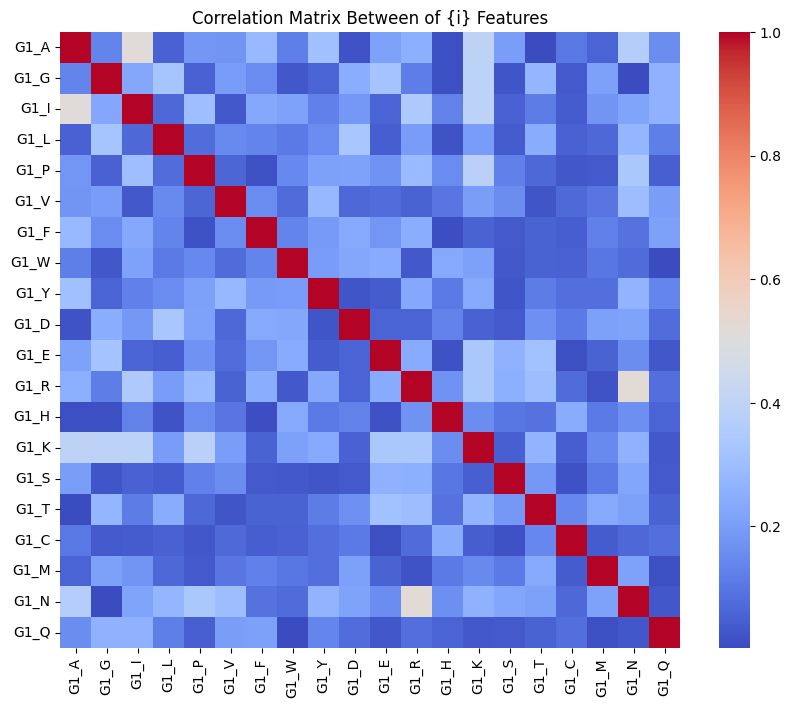

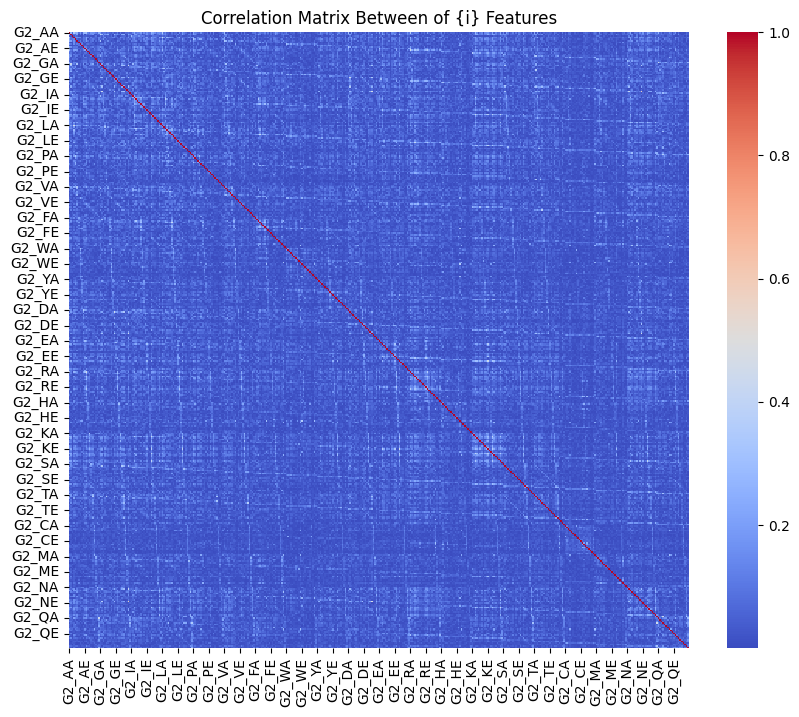

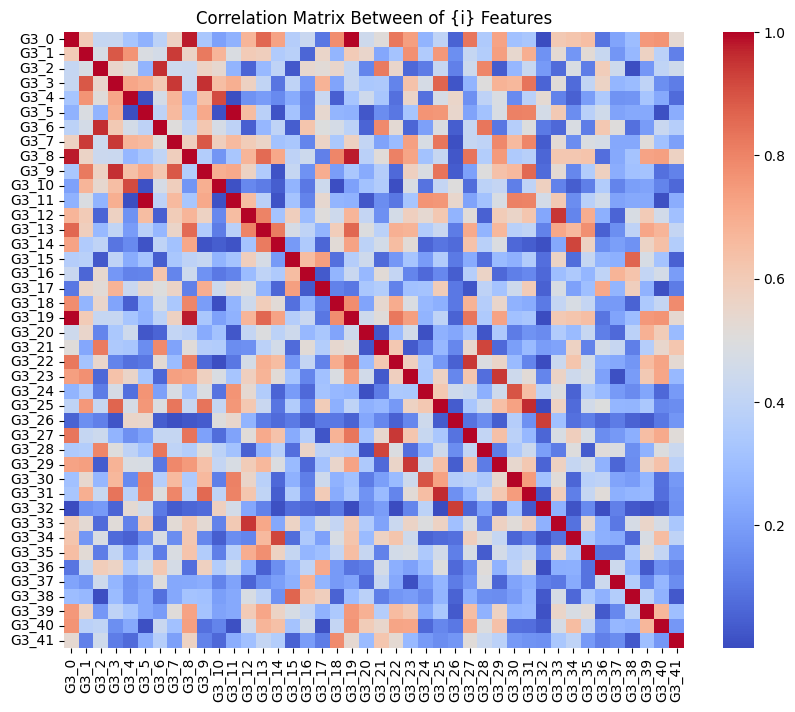

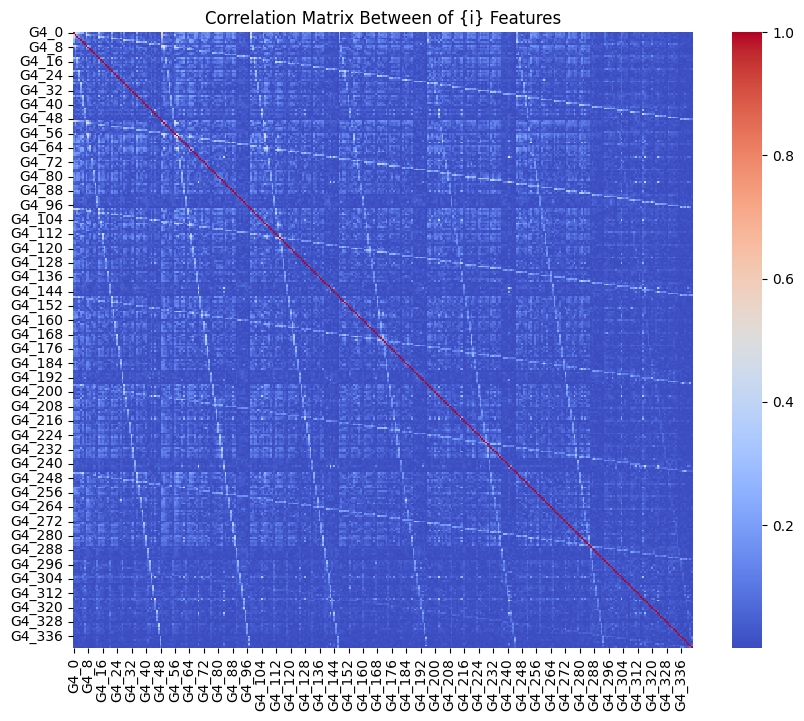

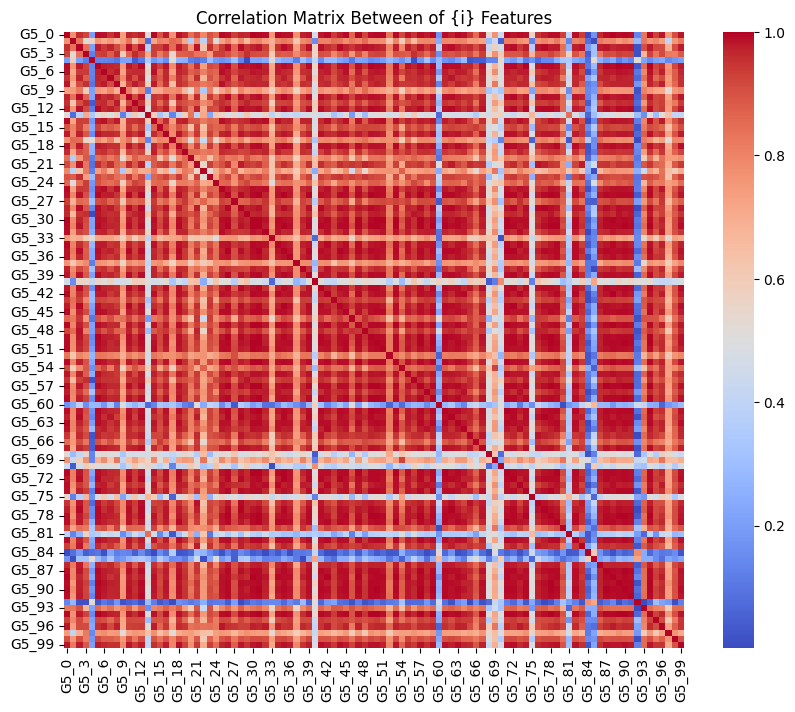

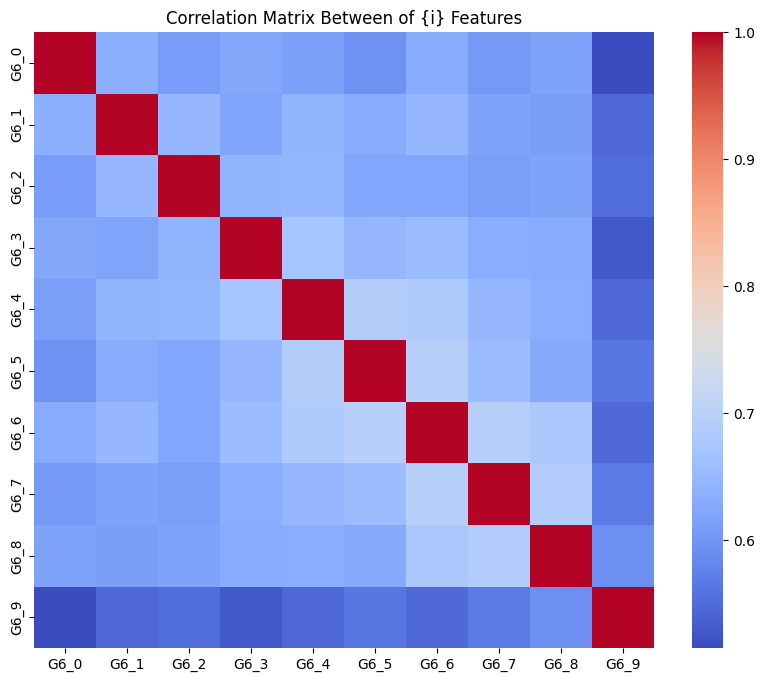

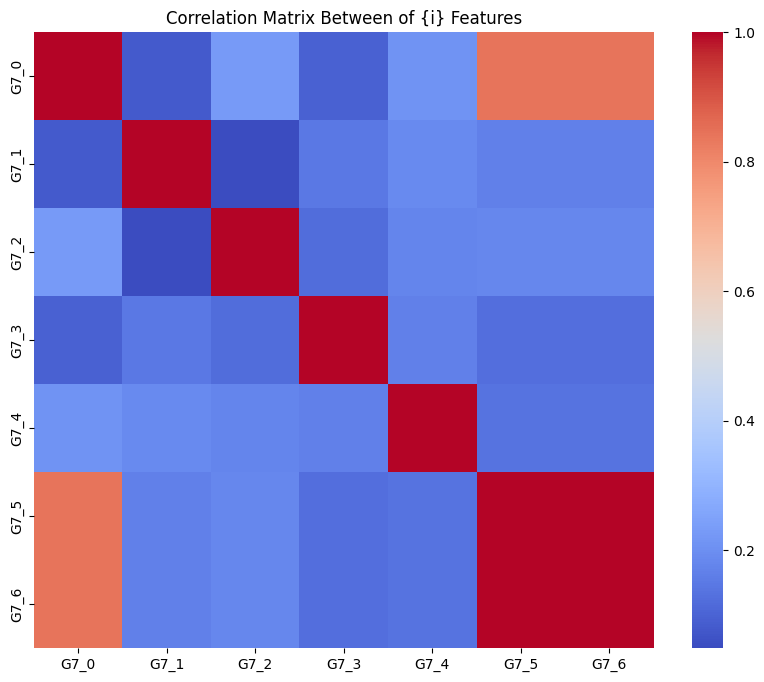

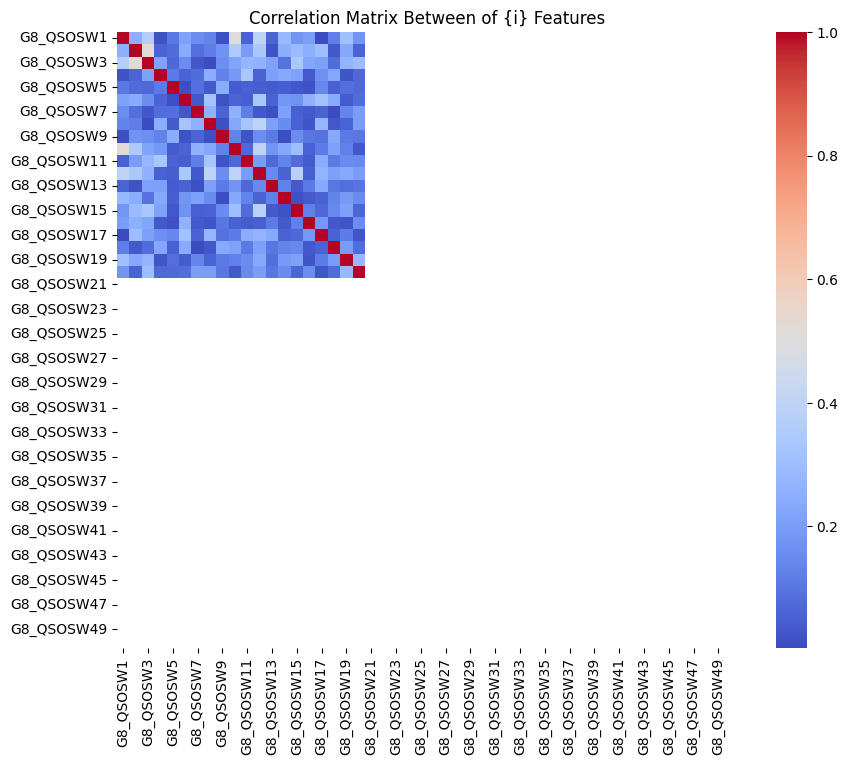

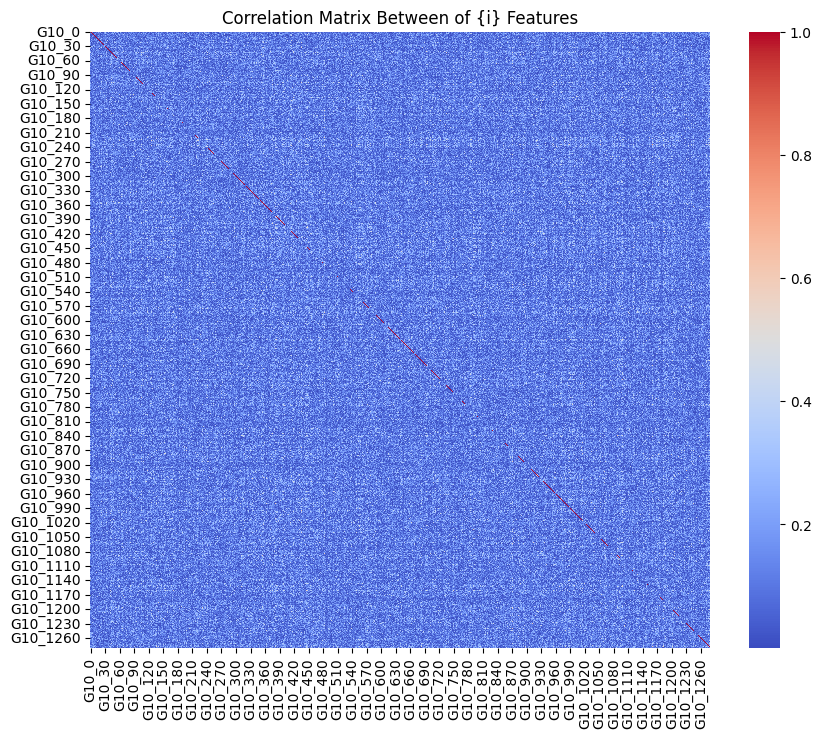

In [21]:
# Features list
features = ["^G1_", "^G2_", "^G3_", "^G4_", "^G5_", "^G6_", "^G7_", "^G8_", "^G10_"]
for i in range(len(features)):
    feature_x = features[i]
    gx_features = labeled_data.filter(regex=feature_x)

    # Compute the correlation matrix
    correlation_matrix = gx_features.corr().abs()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix Between of {i} Features")
    plt.show()

> We can see here G5 features are highly correlated between them and for G3 and G7 there are some that are also practically identical also in G8 many features don't present the correlation and after checking those values are all null so to drop

#### ***Correlated Features***

In [22]:
# Dropping the empty columns
def drop_zero_columns(data, dataset_name="dataset"):
    zero_columns = data.columns[(data == 0).all()]
    cleaned_data = data.drop(columns=zero_columns)

    print(f"[{dataset_name}] Dropped zero-value columns: {list(zero_columns)}")
    return cleaned_data

labeled_data = drop_zero_columns(labeled_data)
others_features = drop_zero_columns(others_features)

[dataset] Dropped zero-value columns: ['G8_QSOSW21', 'G8_QSOSW22', 'G8_QSOSW23', 'G8_QSOSW24', 'G8_QSOSW25', 'G8_QSOSW26', 'G8_QSOSW27', 'G8_QSOSW28', 'G8_QSOSW29', 'G8_QSOSW30', 'G8_QSOSW31', 'G8_QSOSW32', 'G8_QSOSW33', 'G8_QSOSW34', 'G8_QSOSW35', 'G8_QSOSW36', 'G8_QSOSW37', 'G8_QSOSW38', 'G8_QSOSW39', 'G8_QSOSW40', 'G8_QSOSW41', 'G8_QSOSW42', 'G8_QSOSW43', 'G8_QSOSW44', 'G8_QSOSW45', 'G8_QSOSW46', 'G8_QSOSW47', 'G8_QSOSW48', 'G8_QSOSW49', 'G8_QSOSW50']
[dataset] Dropped zero-value columns: ['G8_QSOSW21', 'G8_QSOSW22', 'G8_QSOSW23', 'G8_QSOSW24', 'G8_QSOSW25', 'G8_QSOSW26', 'G8_QSOSW27', 'G8_QSOSW28', 'G8_QSOSW29', 'G8_QSOSW30', 'G8_QSOSW31', 'G8_QSOSW32', 'G8_QSOSW33', 'G8_QSOSW34', 'G8_QSOSW35', 'G8_QSOSW36', 'G8_QSOSW37', 'G8_QSOSW38', 'G8_QSOSW39', 'G8_QSOSW40', 'G8_QSOSW41', 'G8_QSOSW42', 'G8_QSOSW43', 'G8_QSOSW44', 'G8_QSOSW45', 'G8_QSOSW46', 'G8_QSOSW47', 'G8_QSOSW48', 'G8_QSOSW49', 'G8_QSOSW50']


In [23]:
numeric_data = labeled_data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()
threshold = 0.9
highly_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                     if i != j and abs(corr_matrix.loc[i, j]) > threshold]
print(highly_corr_pairs)

[('G1_A', 'G8_QSOSW1'), ('G1_G', 'G8_QSOSW8'), ('G1_I', 'G8_QSOSW10'), ('G1_L', 'G8_QSOSW11'), ('G1_P', 'G8_QSOSW15'), ('G1_V', 'G8_QSOSW20'), ('G1_F', 'G8_QSOSW14'), ('G1_W', 'G8_QSOSW18'), ('G1_Y', 'G8_QSOSW19'), ('G1_D', 'G8_QSOSW4'), ('G1_E', 'G8_QSOSW6'), ('G1_R', 'G8_QSOSW2'), ('G1_H', 'G8_QSOSW9'), ('G1_K', 'G8_QSOSW12'), ('G1_S', 'G8_QSOSW16'), ('G1_T', 'G8_QSOSW17'), ('G1_C', 'G8_QSOSW5'), ('G1_M', 'G8_QSOSW13'), ('G1_N', 'G8_QSOSW3'), ('G1_Q', 'G8_QSOSW7'), ('G3_0', 'G3_8'), ('G3_0', 'G3_19'), ('G3_1', 'G3_7'), ('G3_2', 'G3_6'), ('G3_3', 'G3_7'), ('G3_3', 'G3_9'), ('G3_4', 'G3_10'), ('G3_5', 'G3_11'), ('G3_6', 'G3_2'), ('G3_7', 'G3_1'), ('G3_7', 'G3_3'), ('G3_8', 'G3_0'), ('G3_8', 'G3_19'), ('G3_9', 'G3_3'), ('G3_10', 'G3_4'), ('G3_11', 'G3_5'), ('G3_12', 'G3_33'), ('G3_14', 'G3_34'), ('G3_19', 'G3_0'), ('G3_19', 'G3_8'), ('G3_21', 'G3_28'), ('G3_22', 'G3_27'), ('G3_23', 'G3_29'), ('G3_25', 'G3_31'), ('G3_26', 'G3_32'), ('G3_27', 'G3_22'), ('G3_28', 'G3_21'), ('G3_29', 'G3_23

### **II. Feature Engineering**
#### ***Principal Component Analysis***

In [24]:
X = labeled_data.drop(columns=['family_group'])
X_unlabeled = others_features.drop(columns=['family_group'])
y = labeled_data['family_group']

In [25]:
X.info()
X_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, GCA_000219475.3_ASM21947v3_461 to GCF_000812185.1_ASM81218v1_1442
Columns: 2222 entries, G1_A to G5_99
dtypes: float64(2220), int64(2)
memory usage: 339.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Columns: 2222 entries, G1_A to G5_99
dtypes: float64(2220), int64(2)
memory usage: 339.1 MB


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

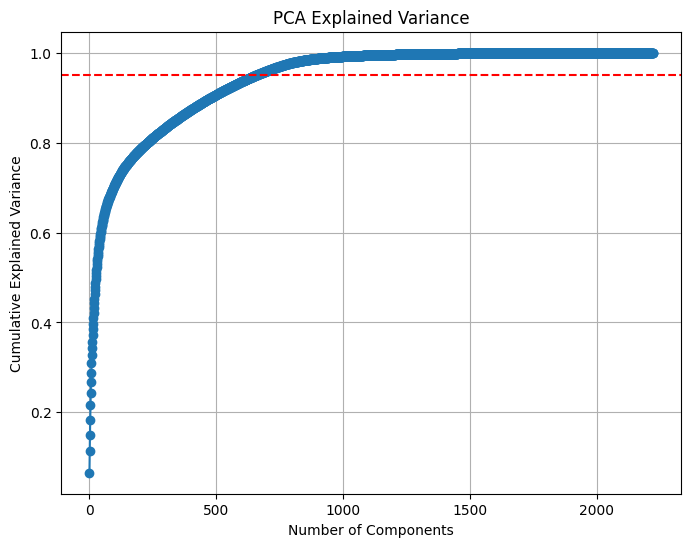

In [27]:
pca = PCA(n_components=None)  # n_components=None retains all components
pca.fit(X_scaled, y)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')  # Threshold for 95% variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

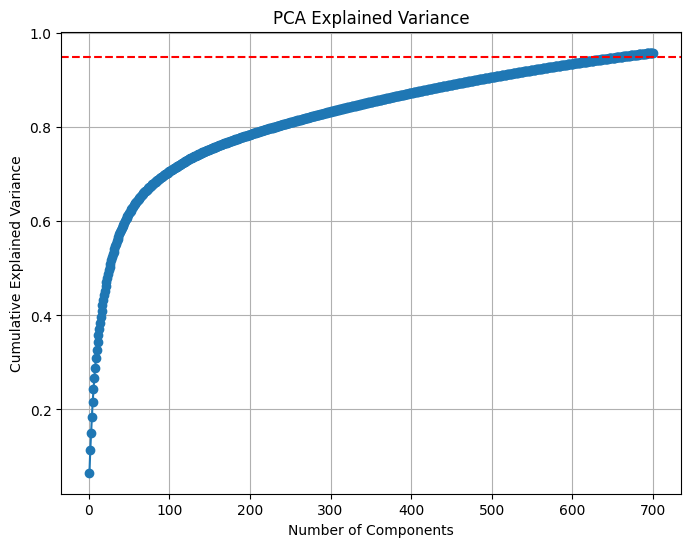

In [28]:
pca = PCA(n_components=700)  # Choose the number of components based on explained variance
X_pca_features = pca.fit_transform(X_scaled)
X_unlabeled_pca_features = pca.transform(X_unlabeled_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')  # Threshold for 95% variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [29]:
X_pca = pd.DataFrame(
    X_pca_features,
    columns=[f'PCA_{i+1}' for i in range(pca.n_components_)],
    index=X.index  # Ensure alignment of indices
)

X_pca_unlabeled = pd.DataFrame(
    X_unlabeled_pca_features,
    columns=[f'PCA_{i+1}' for i in range(pca.n_components_)],
    index=X_unlabeled.index  # Ensure alignment of indices
)

#### ***Feature Importance***

In [30]:
model = RandomForestClassifier()
model.fit(X_pca, y)

RandomForestClassifier()

In [31]:
pca_feature_importances = pd.DataFrame({
    'Feature': X_pca.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(pca_feature_importances)

     Feature  Importance
19    PCA_20    0.025465
18    PCA_19    0.024495
20    PCA_21    0.023100
0      PCA_1    0.021940
11    PCA_12    0.020401
..       ...         ...
597  PCA_598    0.000358
587  PCA_588    0.000351
670  PCA_671    0.000344
582  PCA_583    0.000340
555  PCA_556    0.000316

[700 rows x 2 columns]


In [32]:
pca_feature_importances.describe()

Importance
count  700.000000
mean     0.001429
std      0.003052
min      0.000316
25%      0.000439
50%      0.000486
75%      0.000795
max      0.025465

In [33]:
pca_data = pd.concat([X_pca, y.rename("Class")], axis=1)

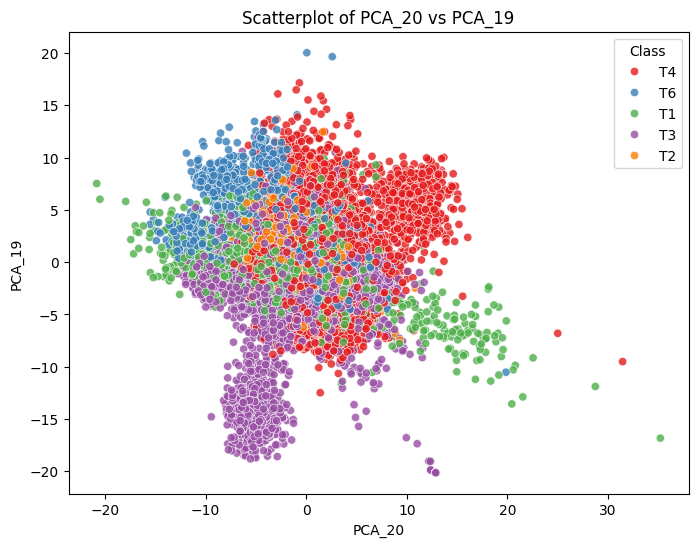

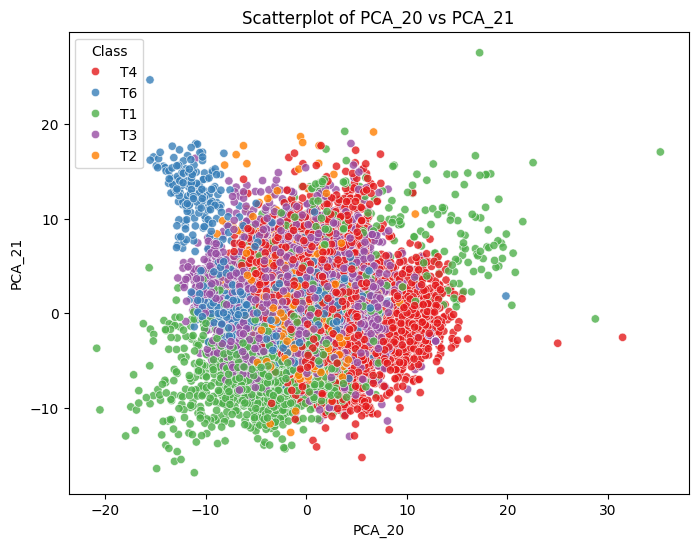

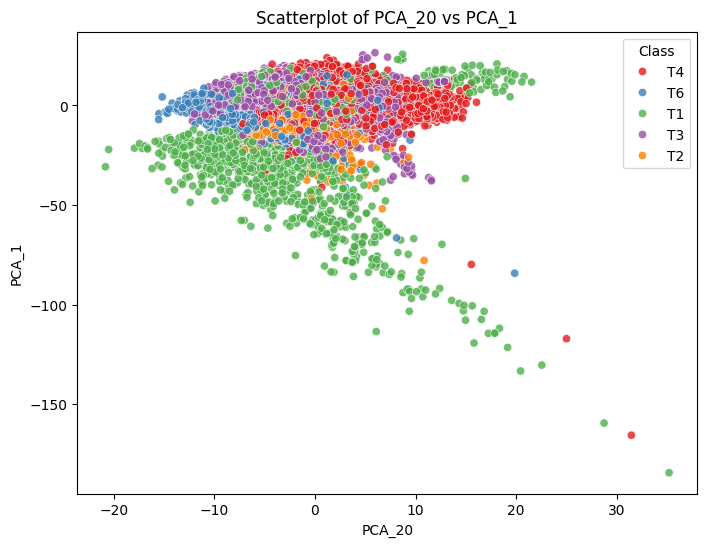

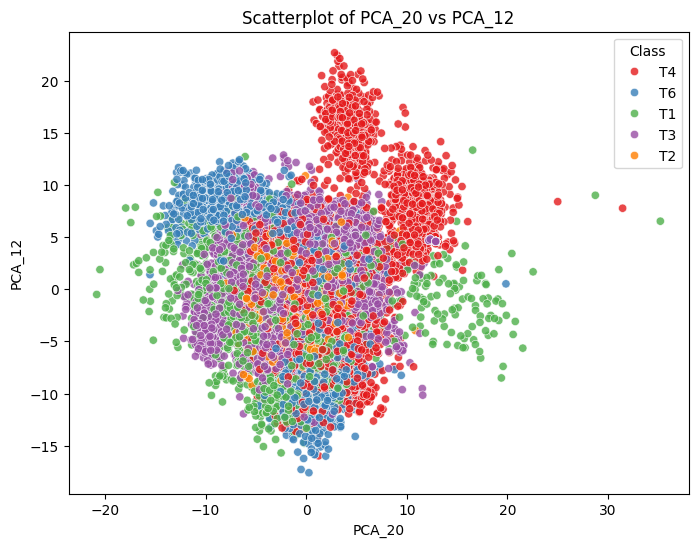

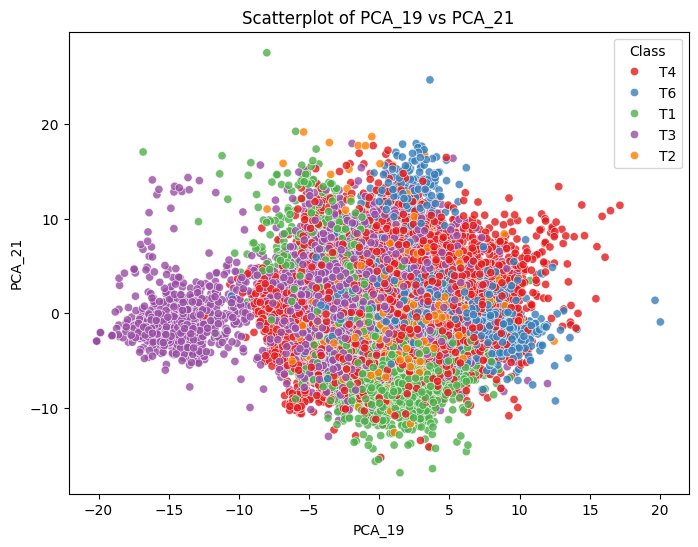

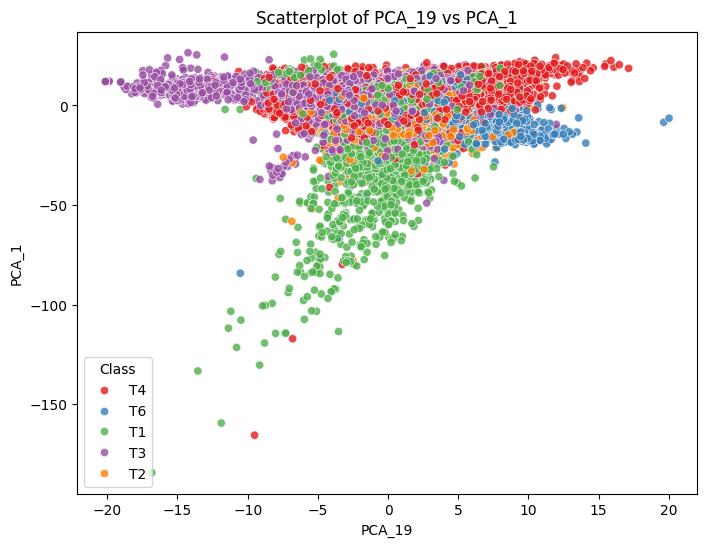

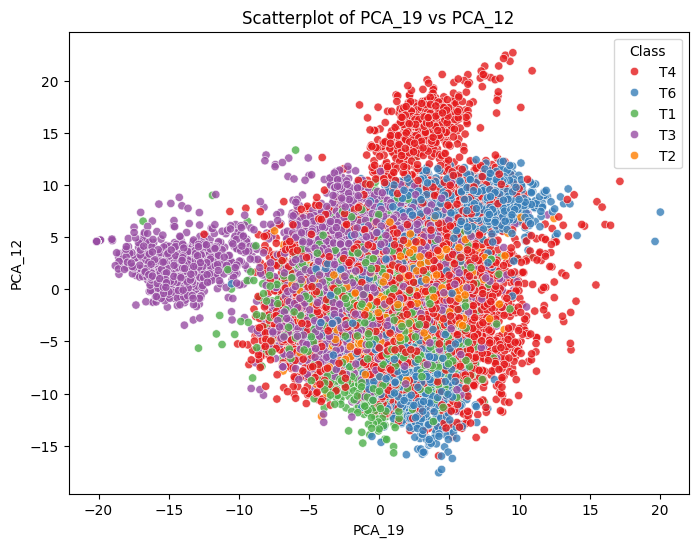

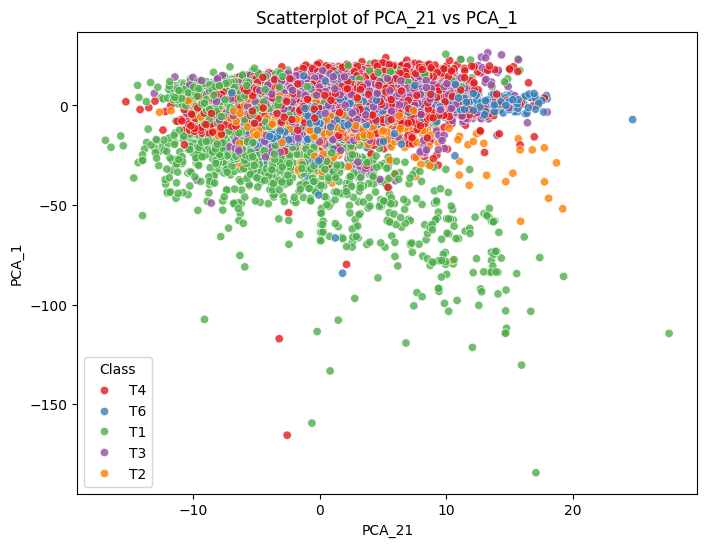

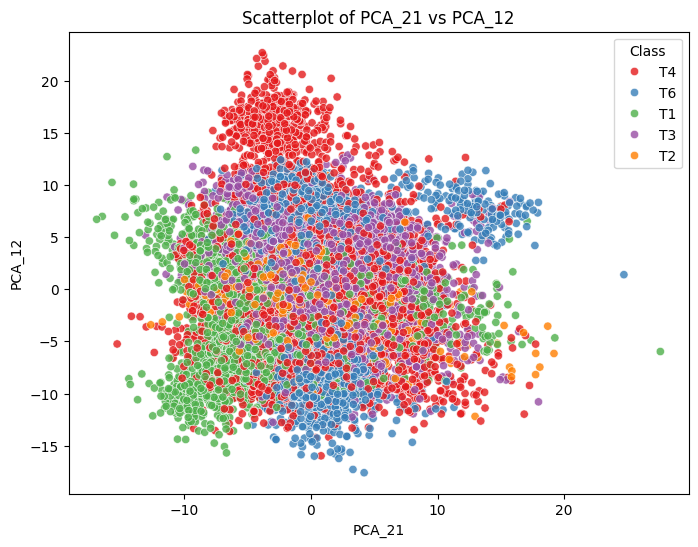

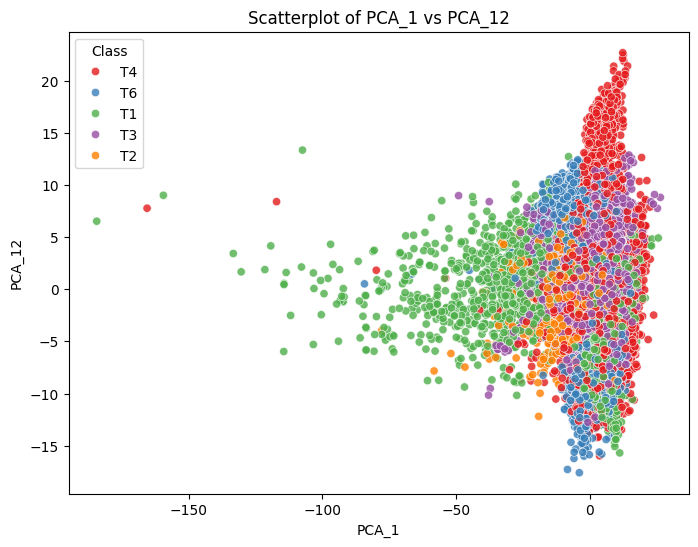

In [34]:
top_n = 5
top_features = pca_feature_importances['Feature'].head(top_n).values

from itertools import combinations

feature_combinations = list(combinations(top_features, 2))

for feature_x, feature_y in feature_combinations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data= pca_data, x=feature_x, y=feature_y, hue='Class', palette='Set1', alpha=0.8)
    plt.title(f'Scatterplot of {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(title='Class')
    plt.show()

> We can see that some groups are formed but most of the data stays in one big group making it harder to differentiate classes
Since we have overlapping classes we can already say that clustering may not work well in this case

## **Part IV: model selection and training**


In [35]:
def k_fold_evaluation(model, X, y_encoded, n_splits = 10):
     
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    auc_scores = []
    auc_pr_scores = []
    precision_scores = []
    recall_scores = []
    fscore_scores = []

    fold = 1
    
    for train_index, test_index in skf.split(X, y_encoded):
        #print("Test class distribution:", y.iloc[test_index].value_counts())
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)
        
        auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        auc_scores.append(auc_score)

        class_pr_aucs = []
        for i in range(y_pred_proba.shape[1]): 
            precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
            auc_pr = auc(recall, precision)
            class_pr_aucs.append(auc_pr)
        auc_pr_scores.append(np.mean(class_pr_aucs))

        precision, recall, fscore, _ = precision_recall_fscore_support(
            y_test, y_pred_proba.argmax(axis=1), average='macro'
        )
        precision_scores.append(precision)
        recall_scores.append(recall)
        fscore_scores.append(fscore)

        print(f"Fold {fold} - AUC: {auc_score:.4f}, PR-AUC: {np.mean(class_pr_aucs):.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F-Score: {fscore:.4f}")
        fold += 1

    # Print summary of results
    print("\n=== Summary of Cross-Validation Results ===")
    print(f"Mean AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
    print(f"Mean PR-AUC: {np.mean(auc_pr_scores):.4f} ± {np.std(auc_pr_scores):.4f}")
    print(f"Mean Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Mean Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    print(f"Mean F-Score: {np.mean(fscore_scores):.4f} ± {np.std(fscore_scores):.4f}")


In [46]:
def initial_evaluation(model, X_train_labeled, y_train_labeled, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    previous_precision = precision_score(y_test, y_pred, average='macro')
    previous_recall = recall_score(y_test, y_pred, average='macro')
    previous_f1 = f1_score(y_test, y_pred, average='macro')
    previous_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

    metrics = {
        "precision": [previous_precision],
        "recall": [previous_recall],
        "f1": [previous_f1],
        "auc": [previous_auc]
    }

    plt.scatter(X_train_labeled["PCA_20"], X_train_labeled["PCA_1"], c=y_train_labeled, cmap='viridis', label='Labeled', alpha=0.7)
    plt.scatter(X_unlabeled["PCA_20"], X_unlabeled["PCA_1"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
    plt.title("Initial Data (Labeled vs Unlabeled)")
    plt.legend()
    plt.show()

    plt.scatter(X_train_labeled["PCA_20"], X_train_labeled["PCA_19"], c=y_train_labeled, cmap='viridis', label='Labeled', alpha=0.7)
    plt.scatter(X_unlabeled["PCA_20"], X_unlabeled["PCA_19"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
    plt.title("Initial Data (Labeled vs Unlabeled)")
    plt.legend()
    plt.show()

    return metrics, previous_f1

In [37]:
def self_training(model, metrics, X_train, y_train, X_test, y_test, X_unlabeled, previous_f1, max_iterations = 10, confidence_threshold = 0.9, tolerance = 0.02):
    # Self-training loop

    for iteration in range(max_iterations):

        if len(X_unlabeled) == 0:
            print("No more unlabeled data to process. Stopping.")
            break

        # Predict on unlabeled data
        unlabeled_pred = model.predict(X_unlabeled)
        unlabeled_pred_proba = model.predict_proba(X_unlabeled)
        
        # Find high-confidence predictions
        max_proba = np.max(unlabeled_pred_proba, axis=1)
        high_confidence_mask = max_proba >= confidence_threshold
        
        # Break if no high-confidence predictions
        if not np.any(high_confidence_mask):
            print(f"No high-confidence predictions in iteration {iteration+1}. Stopping.")
            break
        
        # Add high-confidence predictions to training data
        new_X_train = np.vstack((X_train, X_unlabeled[high_confidence_mask]))
        new_y_train = np.concatenate((y_train, unlabeled_pred[high_confidence_mask]))
        
        # Remove newly labeled data from unlabeled set
        X_unlabeled = X_unlabeled[~high_confidence_mask]
        
        # Retrain the model
        new_model = clone(model)
        new_model.fit(new_X_train, new_y_train)
        
        # Evaluate new model
        new_y_pred = new_model.predict(X_test)
        new_y_pred_proba = new_model.predict_proba(X_test)
        
        new_precision = precision_score(y_test, new_y_pred, average='macro')
        new_recall = recall_score(y_test, new_y_pred, average='macro')
        new_f1 = f1_score(y_test, new_y_pred, average='macro')
        new_auc = roc_auc_score(y_test, new_y_pred_proba, multi_class='ovr', average='macro')
        
        # Update metrics
        metrics["precision"].append(new_precision)
        metrics["recall"].append(new_recall)
        metrics["f1"].append(new_f1)
        metrics["auc"].append(new_auc)
        
        # Check if performance improved
        if new_f1 < previous_f1 - tolerance:
            print(f"Performance decreased significantly in iteration {iteration+1}. Stopping.")
            break

        print(f"Iteration {iteration+1}:")
        print(f"  Labeled samples: {len(new_X_train)}")
        print(f"  Remaining unlabeled samples: {len(X_unlabeled)}")
        print(f"  Precision: {new_precision:.4f}, Recall: {new_recall:.4f}, F1: {new_f1:.4f}, AUC: {new_auc:.4f}")
            
        # Update for next iteration
        model = new_model
        X_train = new_X_train
        y_train = new_y_train
        previous_f1 = new_f1

    # Convert metrics to DataFrame for easy visualization
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)
    metrics_df.plot(figsize=(10, 6), marker='o')
    plt.title("Performance Metrics Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return X_train, y_train, X_unlabeled

In [38]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_unlabeled = X_pca_unlabeled.copy()

### **I. Random Forest **

#### ***Model Evaluation***

We will start by doing a kfold cross validation on the labeled data

In [39]:
rf_model = RandomForestClassifier()
k_fold_evaluation(rf_model, X_pca, y_encoded)

Fold 1 - AUC: 0.9980, PR-AUC: 0.9883, Precision: 0.9737, Recall: 0.9331, F-Score: 0.9511
Fold 2 - AUC: 0.9987, PR-AUC: 0.9916, Precision: 0.9707, Recall: 0.9196, F-Score: 0.9410
Fold 3 - AUC: 0.9979, PR-AUC: 0.9889, Precision: 0.9649, Recall: 0.9382, F-Score: 0.9505
Fold 4 - AUC: 0.9979, PR-AUC: 0.9886, Precision: 0.9672, Recall: 0.9215, F-Score: 0.9405
Fold 5 - AUC: 0.9986, PR-AUC: 0.9903, Precision: 0.9700, Recall: 0.9262, F-Score: 0.9453
Fold 6 - AUC: 0.9978, PR-AUC: 0.9898, Precision: 0.9720, Recall: 0.9213, F-Score: 0.9427
Fold 7 - AUC: 0.9980, PR-AUC: 0.9931, Precision: 0.9748, Recall: 0.9372, F-Score: 0.9537
Fold 8 - AUC: 0.9984, PR-AUC: 0.9867, Precision: 0.9672, Recall: 0.9383, F-Score: 0.9515
Fold 9 - AUC: 0.9980, PR-AUC: 0.9902, Precision: 0.9674, Recall: 0.9262, F-Score: 0.9444
Fold 10 - AUC: 0.9985, PR-AUC: 0.9917, Precision: 0.9728, Recall: 0.9210, F-Score: 0.9431

=== Summary of Cross-Validation Results ===
Mean AUC: 0.9982 ± 0.0003
Mean PR-AUC: 0.9899 ± 0.0018
Mean Prec

> The results show that this model is consistent accross all the k-folds and provides good results and now we can try to apply the whole model to unknown data

#### ***Making Predictions***

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_labeled, y_train_labeled)

RandomForestClassifier()

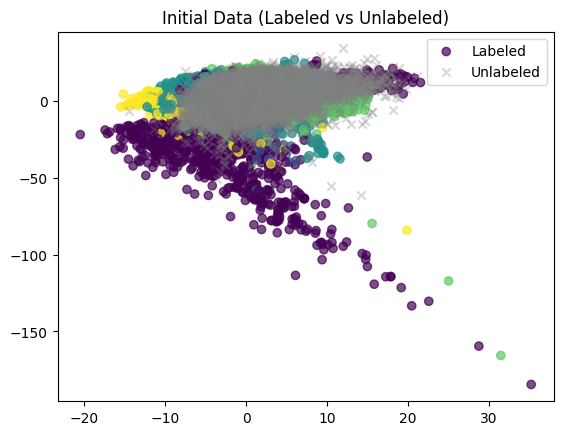

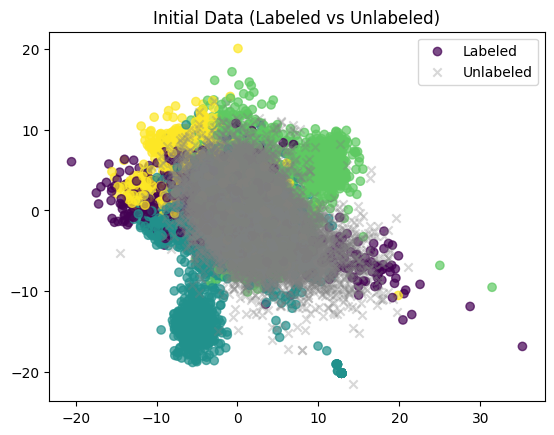

In [47]:
rf_metrics, rf_previous_f1 = initial_evaluation(rf_model, X_train_labeled, y_train_labeled, X_test, y_test)

In [48]:
X_unlabeled = X_pca_unlabeled.copy()
X_train = X_train_labeled.copy()
y_train = y_train_labeled

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Iteration 1:
  Labeled samples: 16006
  Remaining unlabeled samples: 19997
  Precision: 0.9714, Recall: 0.9222, F1: 0.9431, AUC: 0.9974


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


No high-confidence predictions in iteration 2. Stopping.
   precision    recall        f1       auc
0   0.967773  0.921723  0.941511  0.997627
1   0.971401  0.922165  0.943059  0.997382


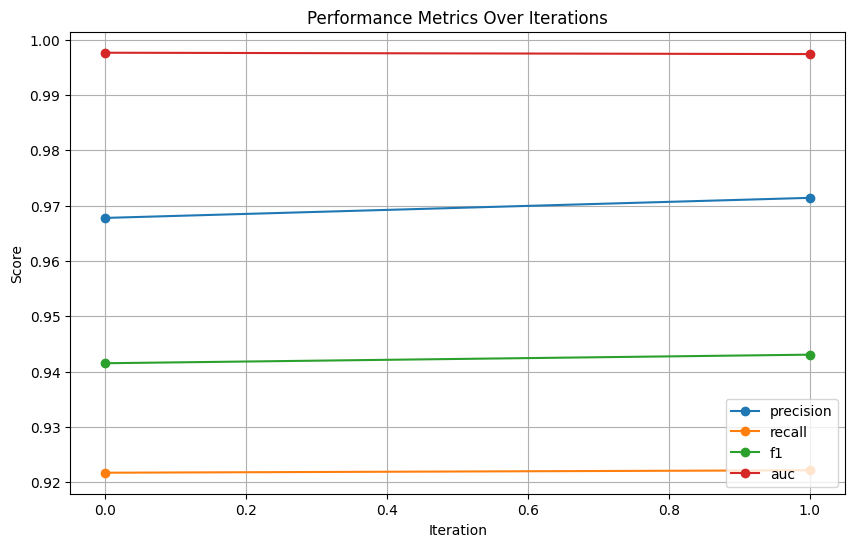

In [49]:
X_train_rf, y_train_rf, X_unlabeled_rf = self_training(rf_model, rf_metrics, X_train, y_train, X_test, y_test, X_unlabeled, rf_previous_f1)

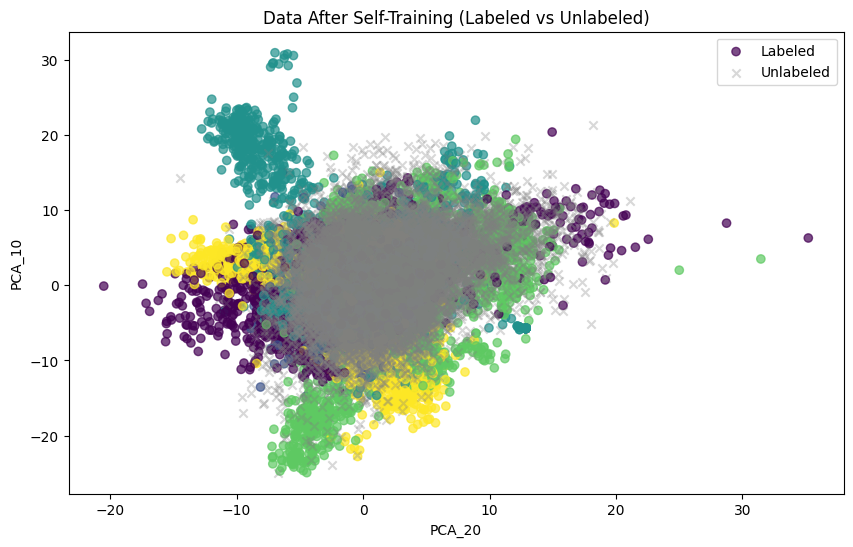

In [50]:
original_columns = X_train_rf.columns if isinstance(X_train_rf, pd.DataFrame) else [f"PCA_{i}" for i in range(1, X_train_rf.shape[1]+1)]

# Convert X_train and X_unlabeled back to DataFrames
X_train_rf_df = pd.DataFrame(X_train_rf, columns=original_columns)
X_unlabeled_rf_df = pd.DataFrame(X_unlabeled_rf, columns=original_columns)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_rf_df["PCA_20"], X_train_rf_df["PCA_10"], c=y_train_rf, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_rf_df["PCA_20"], X_unlabeled_rf_df["PCA_10"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()
plt.show()

In [51]:
print("Original X_train shape:", X_train_labeled.shape)
print("New X_train shape:", X_train_rf.shape)

new_samples = X_train_rf.shape[0] - X_train_labeled.shape[0]
print("Number of new samples added:", new_samples)

Original X_train shape: (16001, 700)
New X_train shape: (16006, 700)
Number of new samples added: 5


It is clear that using this model for prediction we can't predict many unlabeled with high certainty we only have 5 here

### **II. Logistic Regression**
#### ***Model Evaluation***

In [66]:
X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_unlabeled = X_pca_unlabeled.copy()

In [67]:
lr_model = LogisticRegression(class_weight="balanced", random_state=42)
k_fold_evaluation(lr_model, X_pca, y_encoded)

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 - AUC: 0.9980, PR-AUC: 0.9944, Precision: 0.9810, Recall: 0.9823, F-Score: 0.9817


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 - AUC: 0.9987, PR-AUC: 0.9956, Precision: 0.9850, Recall: 0.9812, F-Score: 0.9831


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 - AUC: 0.9990, PR-AUC: 0.9945, Precision: 0.9737, Recall: 0.9737, F-Score: 0.9737


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 - AUC: 0.9995, PR-AUC: 0.9961, Precision: 0.9759, Recall: 0.9802, F-Score: 0.9780


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5 - AUC: 0.9990, PR-AUC: 0.9945, Precision: 0.9761, Recall: 0.9809, F-Score: 0.9784


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 6 - AUC: 0.9993, PR-AUC: 0.9958, Precision: 0.9745, Recall: 0.9743, F-Score: 0.9744


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 7 - AUC: 0.9980, PR-AUC: 0.9954, Precision: 0.9726, Recall: 0.9823, F-Score: 0.9772


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 8 - AUC: 0.9982, PR-AUC: 0.9911, Precision: 0.9721, Recall: 0.9787, F-Score: 0.9752


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 9 - AUC: 0.9990, PR-AUC: 0.9968, Precision: 0.9809, Recall: 0.9742, F-Score: 0.9775
Fold 10 - AUC: 0.9994, PR-AUC: 0.9981, Precision: 0.9812, Recall: 0.9835, F-Score: 0.9823

=== Summary of Cross-Validation Results ===
Mean AUC: 0.9988 ± 0.0005
Mean PR-AUC: 0.9952 ± 0.0017
Mean Precision: 0.9773 ± 0.0042
Mean Recall: 0.9791 ± 0.0035
Mean F-Score: 0.9781 ± 0.0031


#### ***Making Predictions***

In [68]:
lr_model = LogisticRegression(class_weight="balanced", random_state=42)
lr_model.fit(X_train_labeled, y_train_labeled)

LogisticRegression(class_weight='balanced', random_state=42)

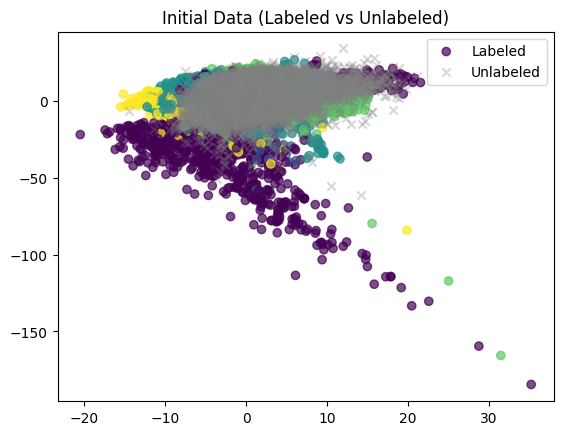

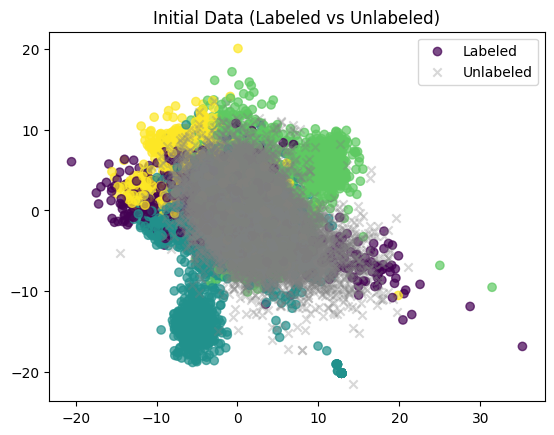

In [69]:
lr_metrics, lr_previous_f1 = initial_evaluation(lr_model, X_train_labeled, y_train_labeled, X_test, y_test)

In [70]:
#initialising the values
X_unlabeled = X_pca_unlabeled.copy()
X_train = X_train_labeled.copy()
y_train = y_train_labeled

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 1:
  Labeled samples: 30148
  Remaining unlabeled samples: 5855
  Precision: 0.9768, Recall: 0.9805, F1: 0.9786, AUC: 0.9985


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 2:
  Labeled samples: 32457
  Remaining unlabeled samples: 3546
  Precision: 0.9755, Recall: 0.9792, F1: 0.9773, AUC: 0.9984


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 3:
  Labeled samples: 33420
  Remaining unlabeled samples: 2583
  Precision: 0.9743, Recall: 0.9783, F1: 0.9763, AUC: 0.9984


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 4:
  Labeled samples: 33856
  Remaining unlabeled samples: 2147
  Precision: 0.9740, Recall: 0.9780, F1: 0.9760, AUC: 0.9983


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 5:
  Labeled samples: 34069
  Remaining unlabeled samples: 1934
  Precision: 0.9714, Recall: 0.9770, F1: 0.9742, AUC: 0.9983


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 6:
  Labeled samples: 34200
  Remaining unlabeled samples: 1803
  Precision: 0.9705, Recall: 0.9769, F1: 0.9736, AUC: 0.9983


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 7:
  Labeled samples: 34320
  Remaining unlabeled samples: 1683
  Precision: 0.9701, Recall: 0.9767, F1: 0.9733, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 8:
  Labeled samples: 34396
  Remaining unlabeled samples: 1607
  Precision: 0.9717, Recall: 0.9781, F1: 0.9748, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 9:
  Labeled samples: 34450
  Remaining unlabeled samples: 1553
  Precision: 0.9720, Recall: 0.9783, F1: 0.9751, AUC: 0.9983


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 10:
  Labeled samples: 34489
  Remaining unlabeled samples: 1514
  Precision: 0.9720, Recall: 0.9777, F1: 0.9748, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 11:
  Labeled samples: 34528
  Remaining unlabeled samples: 1475
  Precision: 0.9712, Recall: 0.9774, F1: 0.9742, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 12:
  Labeled samples: 34557
  Remaining unlabeled samples: 1446
  Precision: 0.9720, Recall: 0.9777, F1: 0.9748, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 13:
  Labeled samples: 34588
  Remaining unlabeled samples: 1415
  Precision: 0.9718, Recall: 0.9780, F1: 0.9748, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 14:
  Labeled samples: 34609
  Remaining unlabeled samples: 1394
  Precision: 0.9702, Recall: 0.9778, F1: 0.9739, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 15:
  Labeled samples: 34682
  Remaining unlabeled samples: 1321
  Precision: 0.9701, Recall: 0.9777, F1: 0.9737, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 16:
  Labeled samples: 34706
  Remaining unlabeled samples: 1297
  Precision: 0.9698, Recall: 0.9769, F1: 0.9733, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 17:
  Labeled samples: 34719
  Remaining unlabeled samples: 1284
  Precision: 0.9699, Recall: 0.9775, F1: 0.9736, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 18:
  Labeled samples: 34728
  Remaining unlabeled samples: 1275
  Precision: 0.9698, Recall: 0.9769, F1: 0.9733, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 19:
  Labeled samples: 34735
  Remaining unlabeled samples: 1268
  Precision: 0.9696, Recall: 0.9769, F1: 0.9731, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 20:
  Labeled samples: 34740
  Remaining unlabeled samples: 1263
  Precision: 0.9700, Recall: 0.9771, F1: 0.9734, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 21:
  Labeled samples: 34745
  Remaining unlabeled samples: 1258
  Precision: 0.9701, Recall: 0.9777, F1: 0.9737, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 22:
  Labeled samples: 34750
  Remaining unlabeled samples: 1253
  Precision: 0.9696, Recall: 0.9769, F1: 0.9731, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 23:
  Labeled samples: 34753
  Remaining unlabeled samples: 1250
  Precision: 0.9701, Recall: 0.9777, F1: 0.9737, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 24:
  Labeled samples: 34754
  Remaining unlabeled samples: 1249
  Precision: 0.9705, Recall: 0.9778, F1: 0.9740, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 25:
  Labeled samples: 34761
  Remaining unlabeled samples: 1242
  Precision: 0.9701, Recall: 0.9777, F1: 0.9737, AUC: 0.9981


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 26:
  Labeled samples: 34765
  Remaining unlabeled samples: 1238
  Precision: 0.9698, Recall: 0.9775, F1: 0.9735, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 27:
  Labeled samples: 34770
  Remaining unlabeled samples: 1233
  Precision: 0.9705, Recall: 0.9777, F1: 0.9740, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 28:
  Labeled samples: 34776
  Remaining unlabeled samples: 1227
  Precision: 0.9700, Recall: 0.9777, F1: 0.9737, AUC: 0.9982


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Iteration 29:
  Labeled samples: 34779
  Remaining unlabeled samples: 1224
  Precision: 0.9723, Recall: 0.9785, F1: 0.9753, AUC: 0.9983
Iteration 30:
  Labeled samples: 34798
  Remaining unlabeled samples: 1205
  Precision: 0.9705, Recall: 0.9777, F1: 0.9740, AUC: 0.9982
    precision    recall        f1       auc
0    0.981334  0.981780  0.981549  0.998491
1    0.976830  0.980517  0.978638  0.998489
2    0.975473  0.979250  0.977335  0.998438
3    0.974317  0.978303  0.976274  0.998377
4    0.973967  0.978015  0.975956  0.998309
5    0.971424  0.977040  0.974163  0.998273
6    0.970489  0.976896  0.973608  0.998282
7    0.970103  0.976739  0.973322  0.998237
8    0.971675  0.978084  0.974795  0.998246
9    0.971964  0.978305  0.975051  0.998256
10   0.972021  0.977707  0.974781  0.998226
11   0.971164  0.977419  0.974193  0.998237
12   0.972021  0.977707  0.974781  0.998168
13   0.971775  0.977989  0.974799  0.998137
14   0.970197  0.977776  0.973869  0.998228
15   0.970083  0.977668 

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


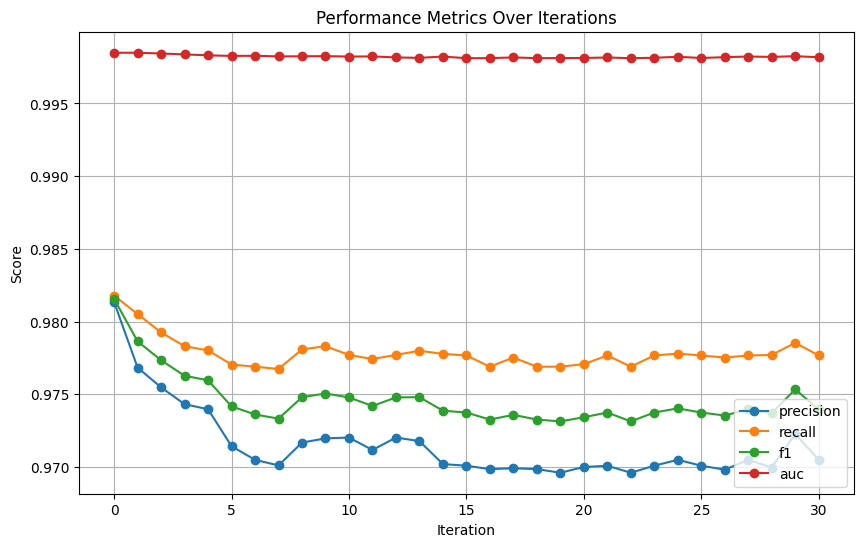

In [71]:
X_train_lr, y_train_lr, X_unlabeled_lr = self_training(lr_model, lr_metrics, X_train, y_train, X_test, y_test, X_unlabeled, lr_previous_f1, max_iterations=30)

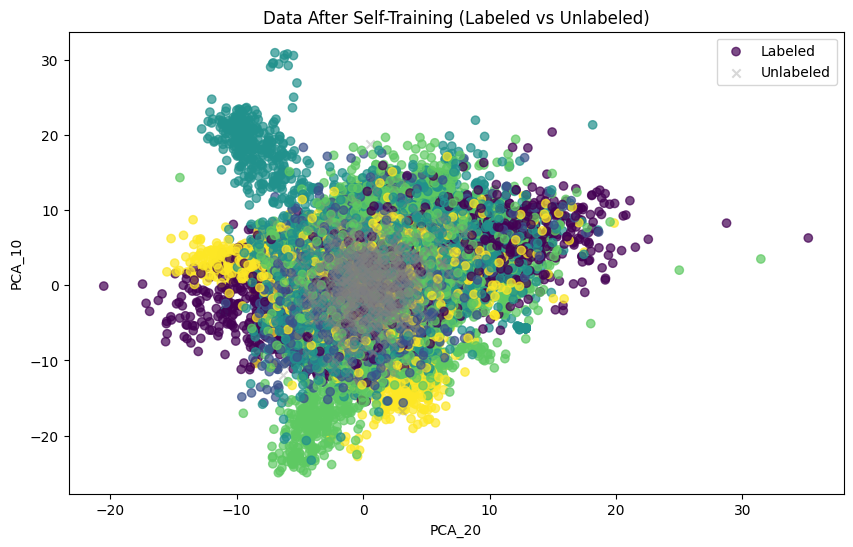

In [ ]:
original_columns = X_train_lr.columns if isinstance(X_train_lr, pd.DataFrame) else [f"PCA_{i}" for i in range(1, X_train_lr.shape[1]+1)]

X_train_lr_df = pd.DataFrame(X_train_lr, columns=original_columns)
X_unlabeled_lr_df = pd.DataFrame(X_unlabeled_lr, columns=original_columns)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_lr_df["PCA_20"], X_train_lr_df["PCA_19"], c=y_train_lr, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_lr_df["PCA_20"], X_unlabeled_lr_df["PCA_19"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()
plt.show()

In [73]:
print("Original X_train shape:", X_train_labeled.shape)
print("New X_train shape:", X_train_lr.shape)

new_samples = X_train_lr.shape[0] - X_train_labeled.shape[0]
print("Number of new samples added:", new_samples)

Original X_train shape: (16001, 700)
New X_train shape: (34798, 700)
Number of new samples added: 18797


### **III.Support Vector Machine**

#### ***Model Evaluation***

In [74]:
X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_unlabeled = X_pca_unlabeled.copy()

In [75]:
svm_model = SVC(probability=True, kernel='rbf')
k_fold_evaluation(svm_model, X_pca, y_encoded)

Fold 1 - AUC: 0.9995, PR-AUC: 0.9984, Precision: 0.9911, Recall: 0.9860, F-Score: 0.9886
Fold 2 - AUC: 0.9998, PR-AUC: 0.9987, Precision: 0.9886, Recall: 0.9897, F-Score: 0.9891
Fold 3 - AUC: 0.9988, PR-AUC: 0.9929, Precision: 0.9833, Recall: 0.9859, F-Score: 0.9845
Fold 4 - AUC: 0.9997, PR-AUC: 0.9970, Precision: 0.9817, Recall: 0.9814, F-Score: 0.9815
Fold 5 - AUC: 0.9998, PR-AUC: 0.9991, Precision: 0.9873, Recall: 0.9898, F-Score: 0.9885
Fold 6 - AUC: 0.9995, PR-AUC: 0.9969, Precision: 0.9905, Recall: 0.9810, F-Score: 0.9856
Fold 7 - AUC: 0.9995, PR-AUC: 0.9982, Precision: 0.9885, Recall: 0.9900, F-Score: 0.9892
Fold 8 - AUC: 0.9993, PR-AUC: 0.9948, Precision: 0.9787, Recall: 0.9833, F-Score: 0.9809
Fold 9 - AUC: 0.9992, PR-AUC: 0.9964, Precision: 0.9871, Recall: 0.9845, F-Score: 0.9857
Fold 10 - AUC: 0.9996, PR-AUC: 0.9981, Precision: 0.9897, Recall: 0.9920, F-Score: 0.9908

=== Summary of Cross-Validation Results ===
Mean AUC: 0.9995 ± 0.0003
Mean PR-AUC: 0.9971 ± 0.0018
Mean Prec

#### ***Making Predictions***

In [76]:
svm_model = SVC(probability=True, kernel='rbf')
svm_model.fit(X_train_labeled, y_train_labeled)

SVC(probability=True)

In [77]:
X_unlabeled = X_pca_unlabeled.copy()
X_train = X_train_labeled.copy()
y_train = y_train_labeled

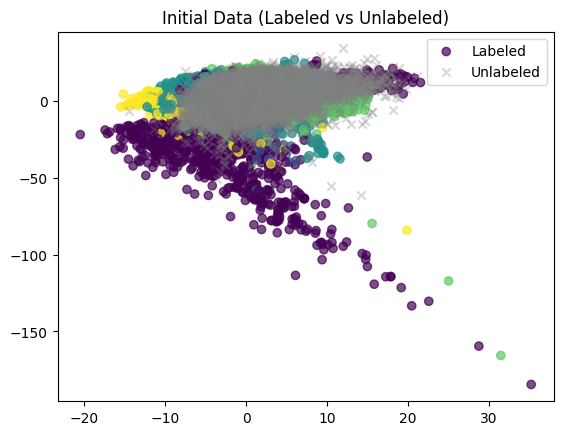

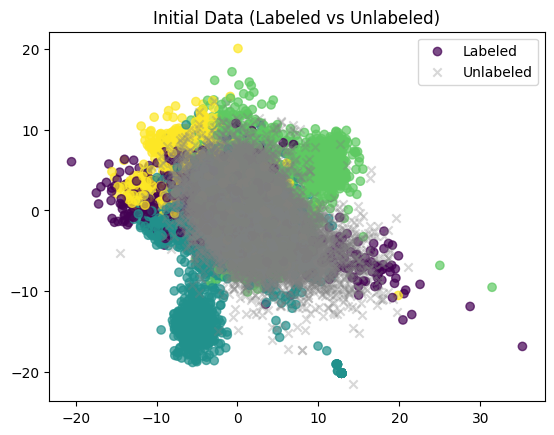

In [78]:
svm_metrics, svm_previous_f1 = initial_evaluation(svm_model, X_train_labeled, y_train_labeled, X_test, y_test)

In [ ]:
X_train_svm, y_train_svm, X_unlabeled_svm = self_training(svm_model, svm_metrics, X_train, y_train, X_test, y_test, X_unlabeled, svm_previous_f1, max_iterations=30)

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 1:
  Labeled samples: 21532
  Remaining unlabeled samples: 14471
  Precision: 0.9809, Recall: 0.9815, F1: 0.9812, AUC: 0.9992


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 2:
  Labeled samples: 26612
  Remaining unlabeled samples: 9391
  Precision: 0.9802, Recall: 0.9801, F1: 0.9802, AUC: 0.9991


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 3:
  Labeled samples: 29482
  Remaining unlabeled samples: 6521
  Precision: 0.9798, Recall: 0.9787, F1: 0.9792, AUC: 0.9990


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 4:
  Labeled samples: 30916
  Remaining unlabeled samples: 5087
  Precision: 0.9789, Recall: 0.9770, F1: 0.9779, AUC: 0.9989


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 5:
  Labeled samples: 31807
  Remaining unlabeled samples: 4196
  Precision: 0.9789, Recall: 0.9776, F1: 0.9782, AUC: 0.9989


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Iteration 6:
  Labeled samples: 32554
  Remaining unlabeled samples: 3449
  Precision: 0.9783, Recall: 0.9770, F1: 0.9777, AUC: 0.9988


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


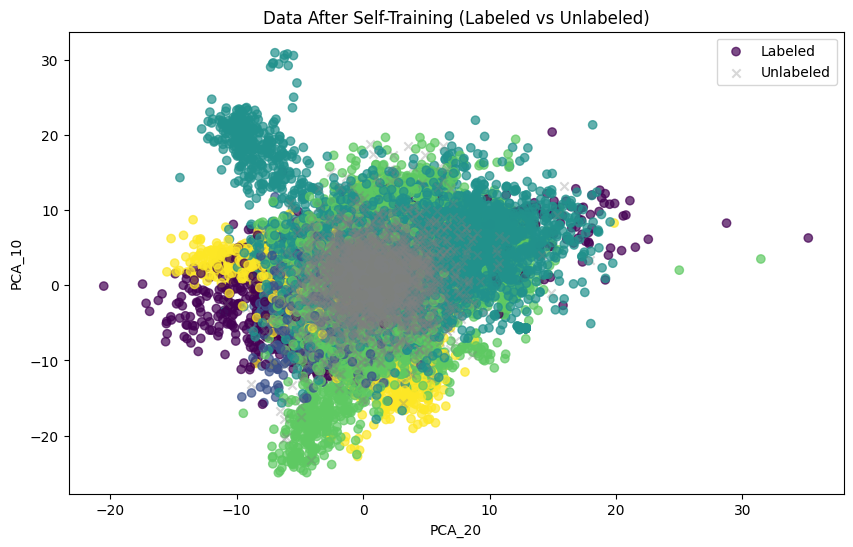

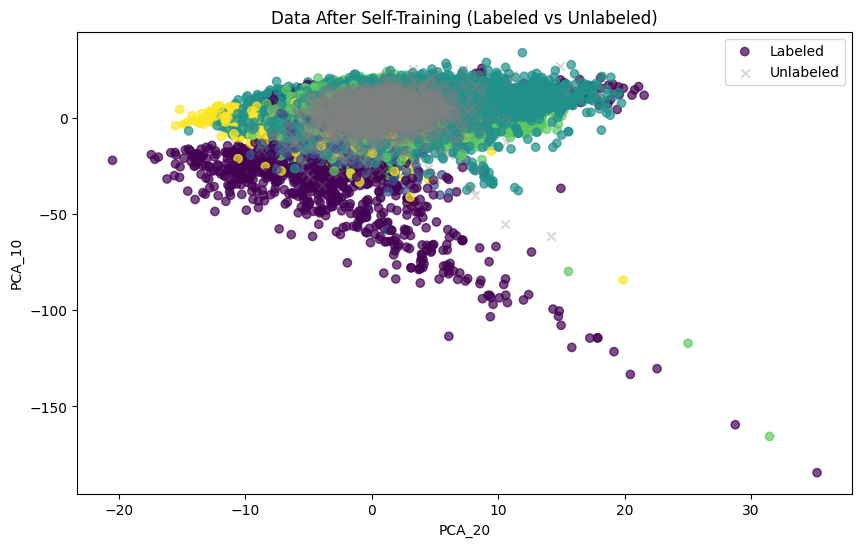

In [ ]:
original_columns = X_train_svm.columns if isinstance(X_train_svm, pd.DataFrame) else [f"PCA_{i}" for i in range(1, X_train_svm.shape[1]+1)]

X_train_svm_df = pd.DataFrame(X_train_svm, columns=original_columns)
X_unlabeled_svm_df = pd.DataFrame(X_unlabeled_svm, columns=original_columns)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_svm_df["PCA_20"], X_train_svm_df["PCA_19"], c=y_train, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_svm_df["PCA_20"], X_unlabeled_svm_df["PCA_19"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()

plt.figure(figsize=(10, 6))
plt.scatter(X_train_svm_df["PCA_20"], X_train_svm_df["PCA_1"], c=y_train, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_svm_df["PCA_20"], X_unlabeled_svm_df["PCA_1"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()
plt.show()

In [314]:
print("Original X_train shape:", X_train_labeled.shape)
print("New X_train shape:", X_train_svm.shape)

new_samples = X_train_svm.shape[0] - X_train_labeled.shape[0]
print("Number of new samples added:", new_samples)

Original X_train shape: (16001, 700)
New X_train shape: (33022, 700)
Number of new samples added: 17021


### **IV. XGBoost Model**

#### ***Model evaluation***

In [315]:
X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_unlabeled = X_pca_unlabeled.copy()

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
k_fold_evaluation(xgb_model, X_pca, y_encoded)

c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - AUC: 0.9993, PR-AUC: 0.9960, Precision: 0.9827, Recall: 0.9730, F-Score: 0.9777


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - AUC: 0.9994, PR-AUC: 0.9971, Precision: 0.9800, Recall: 0.9761, F-Score: 0.9780


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - AUC: 0.9989, PR-AUC: 0.9935, Precision: 0.9780, Recall: 0.9713, F-Score: 0.9746


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - AUC: 0.9993, PR-AUC: 0.9931, Precision: 0.9742, Recall: 0.9689, F-Score: 0.9715


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - AUC: 0.9995, PR-AUC: 0.9964, Precision: 0.9797, Recall: 0.9763, F-Score: 0.9779


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 6 - AUC: 0.9991, PR-AUC: 0.9955, Precision: 0.9774, Recall: 0.9674, F-Score: 0.9722


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 7 - AUC: 0.9990, PR-AUC: 0.9958, Precision: 0.9767, Recall: 0.9773, F-Score: 0.9769


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 8 - AUC: 0.9990, PR-AUC: 0.9911, Precision: 0.9765, Recall: 0.9775, F-Score: 0.9769


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 9 - AUC: 0.9991, PR-AUC: 0.9963, Precision: 0.9793, Recall: 0.9730, F-Score: 0.9760


c:\Users\nwokambounsi\Documents\Workspace\Td\ML\MLProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 10 - AUC: 0.9994, PR-AUC: 0.9967, Precision: 0.9808, Recall: 0.9749, F-Score: 0.9778

=== Summary of Cross-Validation Results ===
Mean AUC: 0.9992 ± 0.0002
Mean PR-AUC: 0.9951 ± 0.0018
Mean Precision: 0.9785 ± 0.0023
Mean Recall: 0.9736 ± 0.0033
Mean F-Score: 0.9759 ± 0.0023


#### ***Making Predictions***

In [319]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_labeled, y_train_labeled)

SVC(probability=True)

In [320]:
X_unlabeled = X_pca_unlabeled.copy()
X_train = X_train_labeled.copy()
y_train = y_train_labeled

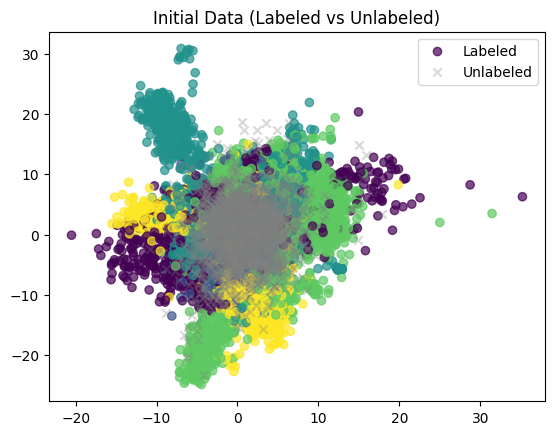

In [ ]:
xgb_metrics, xgb_previous_f1 = initial_evaluation(xgb_model, X_train_labeled, y_train_labeled, X_test, y_test)

No high-confidence predictions in iteration 1. Stopping.
   precision    recall        f1       auc
0    0.98215  0.982493  0.982297  0.999271


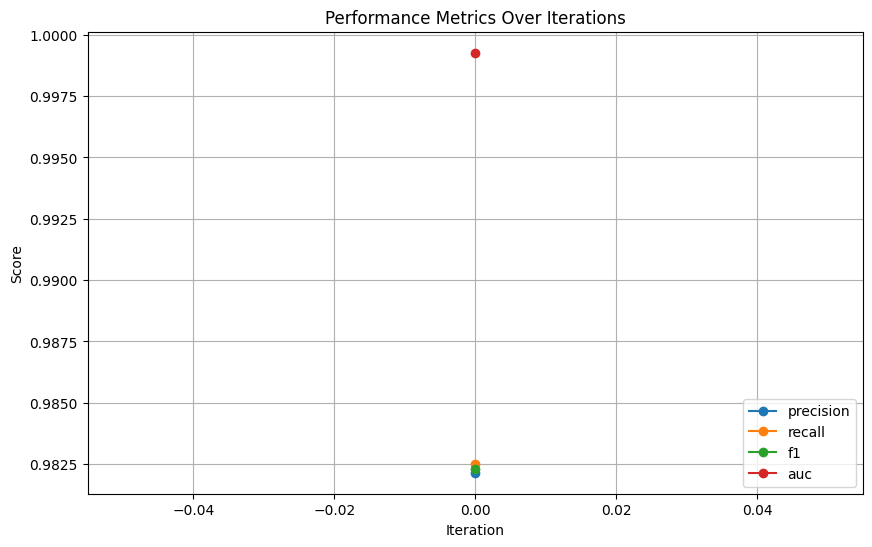

In [325]:
X_train_xgb, y_train_xgb, X_unlabeled_xgb = self_training(model, xgb_metrics, X_train, y_train, X_test, y_test, X_unlabeled, xgb_previous_f1, max_iterations=30)


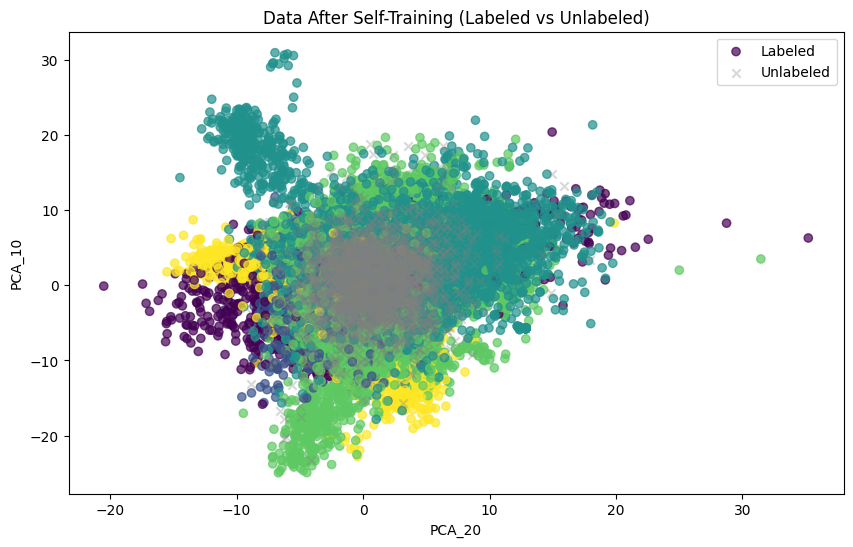

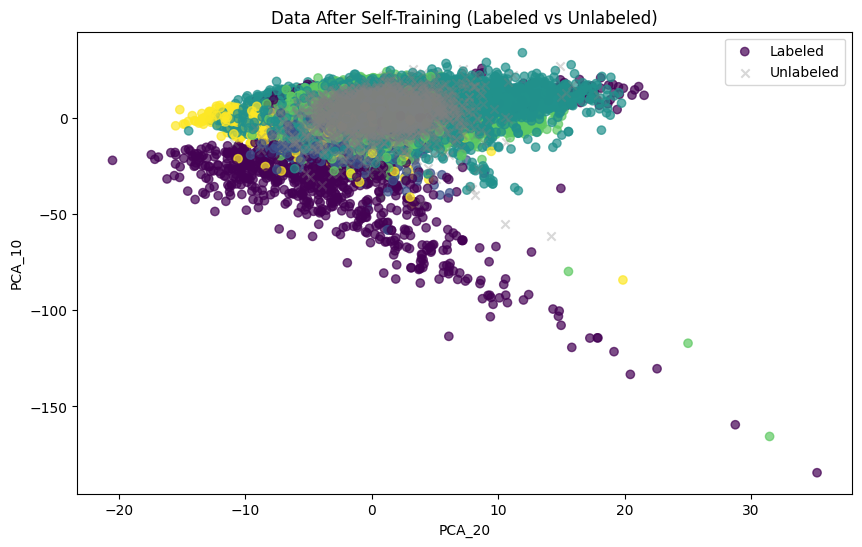

In [326]:
original_columns = X_train_xgb.columns if isinstance(X_train, pd.DataFrame) else [f"PCA_{i}" for i in range(1, X_train_xgb.shape[1]+1)]

X_train_xgb_df = pd.DataFrame(X_train_xgb, columns=original_columns)
X_unlabeled_xgb_df = pd.DataFrame(X_unlabeled_xgb, columns=original_columns)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_xgb_df["PCA_20"], X_train_xgb_df["PCA_10"], c=y_train, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_xgb_df["PCA_20"], X_unlabeled_xgb_df["PCA_10"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()

plt.figure(figsize=(10, 6))
plt.scatter(X_train_xgb_df["PCA_20"], X_train_xgb_df["PCA_1"], c=y_train, cmap='viridis', label='Labeled', alpha=0.7)
plt.scatter(X_unlabeled_xgb_df["PCA_20"], X_unlabeled_xgb_df["PCA_1"], c='gray', marker="x", label='Unlabeled', alpha=0.3)
plt.title("Data After Self-Training (Labeled vs Unlabeled)")
plt.xlabel("PCA_20")
plt.ylabel("PCA_10")
plt.legend()
plt.show()

In [327]:
print("Original X_train shape:", X_train_labeled.shape)
print("New X_train shape:", X_train_xgb.shape)

new_samples = X_train_xgb.shape[0] - X_train_labeled.shape[0]
print("Number of new samples added:", new_samples)

Original X_train shape: (16001, 700)
New X_train shape: (33037, 700)
Number of new samples added: 17036


---